<a href="https://colab.research.google.com/github/krisdsutton/data205/blob/main/Data_205_EDA_MC_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data 205 Project Car Crash Data

### Kris Sutton

###December 15 , 2021

Source 1: dataMontgomery

https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf


Dataset information:
provides general information about all traffic collisions occurring on county and local roadways within Montgomery County, as collected via the Automated Crash Reporting System (ACRS) of the Maryland State Police, and reported by the Montgomery County Police, Gaithersburg Police, Rockville Police, or the Maryland-National Capital Park Police.

Number of observations: 74,568

Number of variables: 44

Each row is a "Collision"

Source 2: dataMontgomery

https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632 

Dataset information: information on drives in car collisions occurring on county and local roadways. The dataset reports details of all traffic collisions occurring on county and local roadways within Montgomery County, as collected via the Automated Crash Reporting System (ACRS) of the Maryland State Police, and reported by the Montgomery County Police, Gaithersburg Police, Rockville Police, or the Maryland-National Capital Park Police. This dataset shows each collision data recorded and the drivers involved.

Number of observations: 134k

Number of variables: 43

Each row is a "Driver"

Source 3: Kaggle

https://www.kaggle.com/sobhanmoosavi/us-accidents  

Dataset information: information on drives in car collisions occurring on county and local roadways. The dataset reports details of all traffic collisions occurring on county and local roadways within Montgomery County, as collected via the Automated Crash Reporting System (ACRS) of the Maryland State Police, and reported by the Montgomery County Police, Gaithersburg Police, Rockville Police, or the Maryland-National Capital Park Police. This dataset shows each collision data recorded and the drivers involved.

Number of observations: 1,516,064

Number of variables: 47

Each row is a "Collision"

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

Reasearch Questions:

•In what areas of the county are there more accidents and more severe accidents? 
•In what cities in Maryland are there more accidents and more severe accidents? 
•Where in the US are there more accidents and more severe accidents? 
•Is there a seasonal trend in the number and severity of accidents? 
•Can we identify a primary cause of human driven accidents, particularly fatal ones? 
•Who is at risk (Can we identify any socioeconomic trends of where the crashes occur)? 
•Can we identify a primary cause of fatal self-driving accidents? 
•Are these causes similar or different to Tesla reported fatal accidents? 
•How are the means of each similar or different 
•What kind of human behaviors will self-driving cars address? 
•What does this mean for the future of driving safety in Montgomery County?

In [194]:
#import  pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib as mpl 
#import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn
import seaborn as sns
#import ticker
import matplotlib.ticker as mtick
#import folium
import folium
#import os
import os
plt.style.use('classic')
!pip install -U seaborn
!pip install -c conda-forge gmaps
from folium.plugins import HeatMap
from pandas_profiling import ProfileReport
from IPython.display import Image


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


#Part I:  dataMontgomery - MC Car Crash Datasets

In [195]:
# read MC crash dataset

mc_crash = pd.read_csv('https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv')
mc_crash_clean = pd.read_csv('https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv')
mc_driver = pd.read_csv('https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv')
mc_crash.head();

In [196]:
#getting information about number of cloumn and rows, variable types
mc_crash.shape

(75822, 44)

In [197]:
mc_crash.dtypes

Report Number                    object
Local Case Number                object
Agency Name                      object
ACRS Report Type                 object
Crash Date/Time                  object
Hit/Run                          object
Route Type                       object
Mile Point                      float64
Mile Point Direction             object
Lane Direction                   object
Lane Number                       int64
Lane Type                        object
Number of Lanes                   int64
Direction                        object
Distance                        float64
Distance Unit                    object
Road Grade                       object
NonTraffic                       object
Road Name                        object
Cross-Street Type                object
Cross-Street Name                object
Off-Road Description             object
Municipality                     object
Related Non-Motorist             object
At Fault                         object


In [198]:
mc_driver.shape

(134209, 43)

In [199]:
mc_driver.dtypes

Report Number                      object
Local Case Number                  object
Agency Name                        object
ACRS Report Type                   object
Crash Date/Time                    object
Route Type                         object
Road Name                          object
Cross-Street Type                  object
Cross-Street Name                  object
Off-Road Description               object
Municipality                       object
Related Non-Motorist               object
Collision Type                     object
Weather                            object
Surface Condition                  object
Light                              object
Traffic Control                    object
Driver Substance Abuse             object
Non-Motorist Substance Abuse       object
Person ID                          object
Driver At Fault                    object
Injury Severity                    object
Circumstance                       object
Driver Distracted By              

###Part I:  Data Wrangling

In [200]:
#Counting n/a's in crash dataset
mc_crash.isna().sum().sort_values(ascending = False)

Non-Motorist Substance Abuse    72548
Related Non-Motorist            71694
Lane Type                       68490
Municipality                    67742
Off-Road Description            66183
Fixed Oject Struck              59827
Second Harmful Event            56752
Intersection Area               54854
Intersection Type               38530
Junction                        20164
Traffic Control                 13396
Road Condition                  12401
Driver Substance Abuse          12123
Surface Condition               11521
Road Division                   10612
Road Grade                      10148
Cross-Street Type               10106
Route Type                      10096
Mile Point Direction            10082
Road Alignment                   9974
Direction                        9650
Mile Point                       9650
Cross-Street Name                9645
Road Name                        9640
Distance Unit                    9640
Lane Direction                   9639
Distance    

In [201]:
#checking driver dataset for n/a
mc_driver.isna().sum().sort_values(ascending = False)

Non-Motorist Substance Abuse      130904
Related Non-Motorist              130035
Off-Road Description              121800
Municipality                      119451
Circumstance                      108986
Equipment Problems                 28464
Driver Substance Abuse             24441
Traffic Control                    20824
Surface Condition                  15815
Cross-Street Type                  13117
Route Type                         13106
Cross-Street Name                  12415
Road Name                          12410
Weather                            10537
Drivers License State               6933
Vehicle Continuing Dir              2042
Vehicle Going Dir                   2042
Vehicle Body Type                   1979
Light                               1130
Collision Type                       445
Vehicle Movement                     277
Vehicle Second Impact Location       256
Vehicle Damage Extent                241
Vehicle First Impact Location        156
Vehicle Model   

In [202]:
## joining driver and crash datasets
mc_incidents = pd.merge(mc_crash,mc_driver,on='Report Number',how='outer')
mc_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134694 entries, 0 to 134693
Data columns (total 86 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   134694 non-null  object 
 1   Local Case Number_x             134694 non-null  object 
 2   Agency Name_x                   134694 non-null  object 
 3   ACRS Report Type_x              134694 non-null  object 
 4   Crash Date/Time_x               134694 non-null  object 
 5   Hit/Run                         134692 non-null  object 
 6   Route Type_x                    121347 non-null  object 
 7   Mile Point                      122033 non-null  float64
 8   Mile Point Direction            121368 non-null  object 
 9   Lane Direction                  122048 non-null  object 
 10  Lane Number                     134694 non-null  int64  
 11  Lane Type                       12641 non-null   object 
 12  Number of Lanes 

In [203]:
## checking n/a for new dataset
mc_incidents.isna().sum().sort_values(ascending = False)

Non-Motorist Substance Abuse_y    131389
Non-Motorist Substance Abuse_x    131331
Related Non-Motorist_y            130520
Related Non-Motorist_x            130445
Off-Road Description_y            122285
                                   ...  
NonTraffic                             0
At Fault                               0
Latitude_x                             0
Location_x                             0
Report Number                          0
Length: 86, dtype: int64

In [204]:
mc_incidents.shape

(134694, 86)

In [205]:
mc_incidents.dtypes

Report Number           object
Local Case Number_x     object
Agency Name_x           object
ACRS Report Type_x      object
Crash Date/Time_x       object
                        ...   
Vehicle Model           object
Equipment Problems      object
Latitude_y             float64
Longitude_y            float64
Location_y              object
Length: 86, dtype: object

In [206]:
#removing columns with high number of n/a's:  > 20,000 
mc_incidents = mc_incidents[['Road Condition','Driver Substance Abuse_x','Surface Condition_x','Mile Point Direction',
                      'Road Alignment','Direction','Mile Point','Cross-Street Name_x','Road Name_x',
                      'Lane Direction','Weather_x','Light_x','Collision Type_x','Hit/Run','Crash Date/Time_x',
                      'ACRS Report Type_x','Agency Name_x','Location_x','Number of Lanes','Longitude_x','At Fault',
                      'Latitude_x','Report Number','Driver Distracted By','Injury Severity','Vehicle Model',
                      'Vehicle Make','Vehicle Year','Driverless Vehicle','Speed Limit','Vehicle Body Type']]

In [207]:
#removing '_x' from column names
mc_incidents.columns = [col.replace('_x', '') for col in mc_incidents.columns]
mc_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134694 entries, 0 to 134693
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Road Condition          116978 non-null  object 
 1   Driver Substance Abuse  114035 non-null  object 
 2   Surface Condition       118622 non-null  object 
 3   Mile Point Direction    121368 non-null  object 
 4   Road Alignment          121522 non-null  object 
 5   Direction               122033 non-null  object 
 6   Mile Point              122033 non-null  float64
 7   Cross-Street Name       122041 non-null  object 
 8   Road Name               122046 non-null  object 
 9   Lane Direction          122048 non-null  object 
 10  Weather                 124072 non-null  object 
 11  Light                   133552 non-null  object 
 12  Collision Type          134238 non-null  object 
 13  Hit/Run                 134692 non-null  object 
 14  Crash Date/Time     

In [208]:
#changing all cap columns to title format
mc_incidents['Road Condition'] = mc_incidents['Road Condition'].str.title()
mc_incidents['Driver Substance Abuse'] = mc_incidents['Driver Substance Abuse'].str.title()
mc_incidents['Road Alignment'] = mc_incidents['Road Alignment'].str.title()
mc_incidents['Cross-Street Name'] = mc_incidents['Cross-Street Name'].str.title()
mc_incidents['Road Name'] = mc_incidents['Road Name'].str.title()
mc_incidents['Weather'] = mc_incidents['Weather'].str.title()
mc_incidents['Collision Type'] = mc_incidents['Collision Type'].str.title()
mc_incidents['Light'] = mc_incidents['Light'].str.title()
mc_incidents['Agency Name'] = mc_incidents['Agency Name'].str.title()
mc_incidents['Driver Distracted By'] = mc_incidents['Driver Distracted By'].str.title()
mc_incidents['Injury Severity'] = mc_incidents['Injury Severity'].str.title()
mc_incidents['Vehicle Model'] = mc_incidents['Vehicle Model'].str.title()
mc_incidents['Vehicle Make'] = mc_incidents['Vehicle Make'].str.title()
mc_incidents['Vehicle Body Type'] = mc_incidents['Vehicle Body Type'].str.title()

In [209]:
mc_incidents.head()

,Road Condition,Driver Substance Abuse,Surface Condition,Mile Point Direction,Road Alignment,Direction,Mile Point,Cross-Street Name,Road Name,Lane Direction,Weather,Light,Collision Type,Hit/Run,Crash Date/Time,ACRS Report Type,Agency Name,Location,Number of Lanes,Longitude,At Fault,Latitude,Report Number,Driver Distracted By,Injury Severity,Vehicle Model,Vehicle Make,Vehicle Year,Driverless Vehicle,Speed Limit,Vehicle Body Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Daylight,Single Vehicle,No,09/27/2019 09:38:00 AM,Property Damage Crash,Montgomery County Police,"(39.0267, -77.136785)",0,-77.136785,DRIVER,39.026700,MCP3048005T,Unknown,No Apparent Injury,Corolla,Toyota,2003.0,No,10.0,Passenger Car
1,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Daylight,Straight Movement Angle,Yes,05/02/2020 02:16:00 PM,Property Damage Crash,Gaithersburg Police Depar,"(39.14795617, -77.2296164)",0,-77.229616,DRIVER,39.147956,EJ78460055,Unknown,No Apparent Injury,Expedition,Ford,1999.0,No,5.0,(Sport) Utility Vehicle
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Daylight,Straight Movement Angle,No,09/15/2020 03:33:00 PM,Injury Crash,Montgomery County Police,"(39.18886167, -77.202455)",0,-77.202455,DRIVER,39.188862,MCP3245000H,Looked But Did Not See,No Apparent Injury,Sentra,Nissan,2016.0,No,15.0,Passenger Car
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Daylight,Straight Movement Angle,No,09/15/2020 03:33:00 PM,Injury Crash,Montgomery County Police,"(39.18886167, -77.202455)",0,-77.202455,DRIVER,39.188862,MCP3245000H,Not Distracted,Suspected Minor Injury,Murano,Nissan,2012.0,No,15.0,Passenger Car
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daylight,NaN,No,10/14/2020 08:40:00 AM,Property Damage Crash,Maryland-National Capital,"(39.15869731, -77.14679055)",0,-77.146791,UNKNOWN,39.158697,HA23890011,Not Distracted,No Apparent Injury,Tk,Ford,2016.0,No,10.0,"Medium/Heavy Trucks 3 Axles (Over 10,000Lbs (4..."


In [210]:
#mc_incidents.rename(columns={'year': 'Year', 'month': 'Month'}, inplace=True)

In [211]:
# removing n/a values
#mc_crash2 = mc_incidents.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#mc_crash2.head()

##Visualizations

In [212]:
#graphing ACRS report type by frequency
acrs_type = mc_incidents["ACRS Report Type"].value_counts()
acrs_type

Property Damage Crash    84520
Injury Crash             49858
Fatal Crash                316
Name: ACRS Report Type, dtype: int64

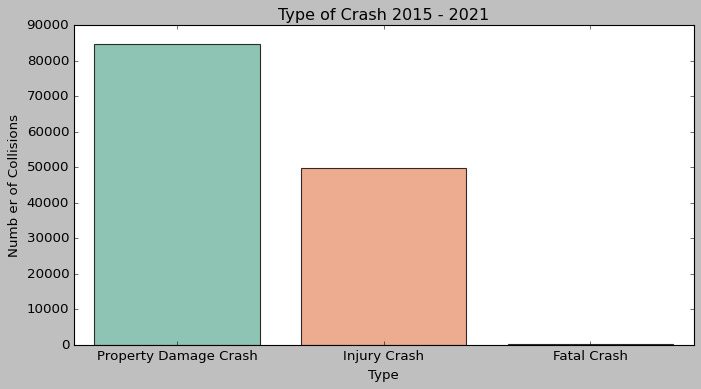

In [213]:
acrs_type = acrs_type[:5,]
plt.figure(figsize=(10,5))
sns.barplot(x=acrs_type.index, y=acrs_type.values, palette="Set2", alpha=0.8)
plt.title('Type of Crash 2015 - 2021')
plt.ylabel('Numb er of Collisions', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

In [214]:
fatal_percentage = (316/(84520+49858+316)) * 100
fatal_percentage

0.23460584732801756

Fatal crashes are 0.23% of all crashes

In [215]:
injury_percentage = (49858/(84520+49858+316)) * 100
injury_percentage

37.01575422810222

Injury crashes are 37%.  Remaining 62.77% must be all property damage crashes.

In [216]:
# cleaning values in 'Collision Type' for aesthics
mc_incidents['Collision Type'] = mc_incidents['Collision Type'] .str.capitalize()
mc_incidents['Collision Type'] = mc_incidents['Collision Type'].replace(to_replace = 'Same dir rear end',
                 value ='Same direction rear end')

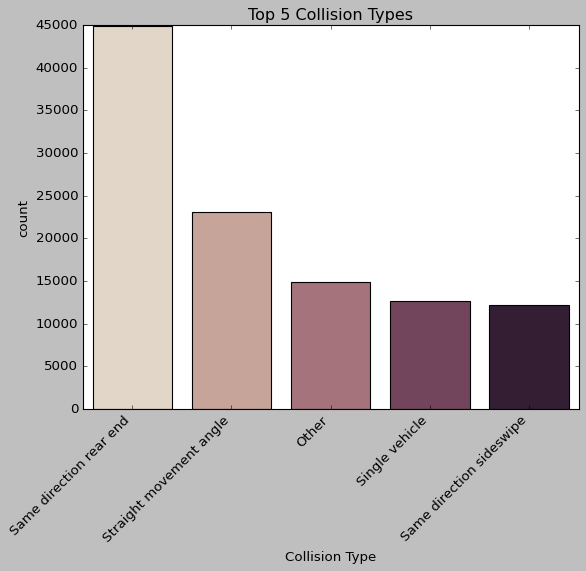

In [217]:
#bar graph using count and type of collision
coll_count = sns.countplot(x='Collision Type',data=mc_incidents, palette="ch:.25",order=pd.value_counts(mc_incidents['Collision Type']).iloc[:5 ].index)
coll_count.set_xticklabels(coll_count.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Top 5 Collision Types')
plt.show()

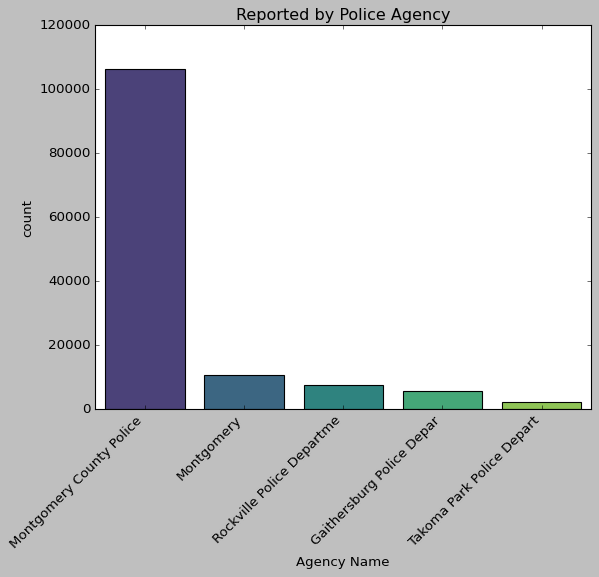

In [218]:
#bar graph: using count which agencies report the most crashes
ag_count = sns.countplot(x='Agency Name',data=mc_incidents, palette="viridis",order=pd.value_counts(mc_incidents['Agency Name']).iloc[:5 ].index)
ag_count.set_xticklabels(ag_count.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Reported by Police Agency')
plt.show()

In [219]:
#number of collisions that are hit & run and not 
mc_incidents['Hit/Run'].value_counts()

No     112995
Yes     21697
Name: Hit/Run, dtype: int64

In [220]:
#percentage of collisions that are hit & run and not 
mc_incidents['Hit/Run'].value_counts(normalize=True)


No     0.838914
Yes    0.161086
Name: Hit/Run, dtype: float64

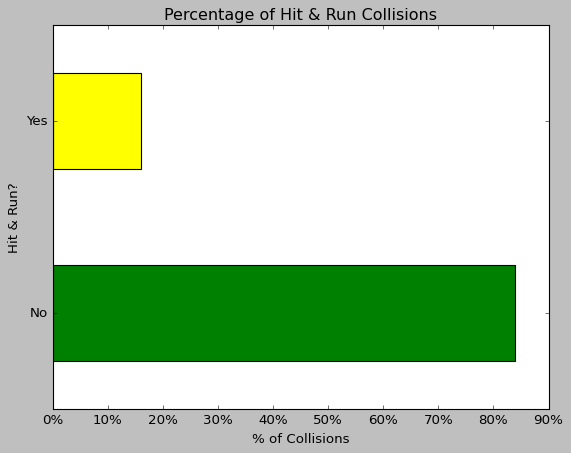

In [221]:
#graphing above percentages
hit_run = mc_incidents['Hit/Run'].value_counts(normalize=True).plot(kind='barh', color=['green','yellow'])
hit_run.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Percentage of Hit & Run Collisions')
plt.ylabel('Hit & Run?', fontsize=12)
plt.xlabel('% of Collisions', fontsize=12)
plt.show()

Around 16% of collisions are hit and run.  Seems like a high numbers.  Why are so many driveres leavaing the scene?  Is it due to intoxicatin and risk of arrest?

Hypothesis:  Substance Abuse are related to Hit & Runs

Chi-Squared Hypothesis Test 1

In [222]:
contigency2= pd.crosstab(mc_incidents['Driver Substance Abuse'], mc_incidents['Hit/Run'])
contigency2

Hit/Run,No,Yes
Driver Substance Abuse,,
Alcohol Contributed,518,161
"Alcohol Contributed, Alcohol Present",4,2
"Alcohol Contributed, N/A",172,62
"Alcohol Contributed, N/A, None Detected",8,0
"Alcohol Contributed, None Detected",606,181
"Alcohol Contributed, None Detected, Unknown",3,4
"Alcohol Contributed, Unknown",4,2
Alcohol Present,1271,450
"Alcohol Present, Illegal Drug Present",0,2


In [223]:
contigency_pct2 = pd.crosstab(mc_incidents['Driver Substance Abuse'], mc_incidents['Hit/Run'], normalize='index')
contigency_pct2

Hit/Run,No,Yes
Driver Substance Abuse,,
Alcohol Contributed,0.762887,0.237113
"Alcohol Contributed, Alcohol Present",0.666667,0.333333
"Alcohol Contributed, N/A",0.735043,0.264957
"Alcohol Contributed, N/A, None Detected",1.000000,0.000000
"Alcohol Contributed, None Detected",0.770013,0.229987
"Alcohol Contributed, None Detected, Unknown",0.428571,0.571429
"Alcohol Contributed, Unknown",0.666667,0.333333
Alcohol Present,0.738524,0.261476
"Alcohol Present, Illegal Drug Present",0.000000,1.000000


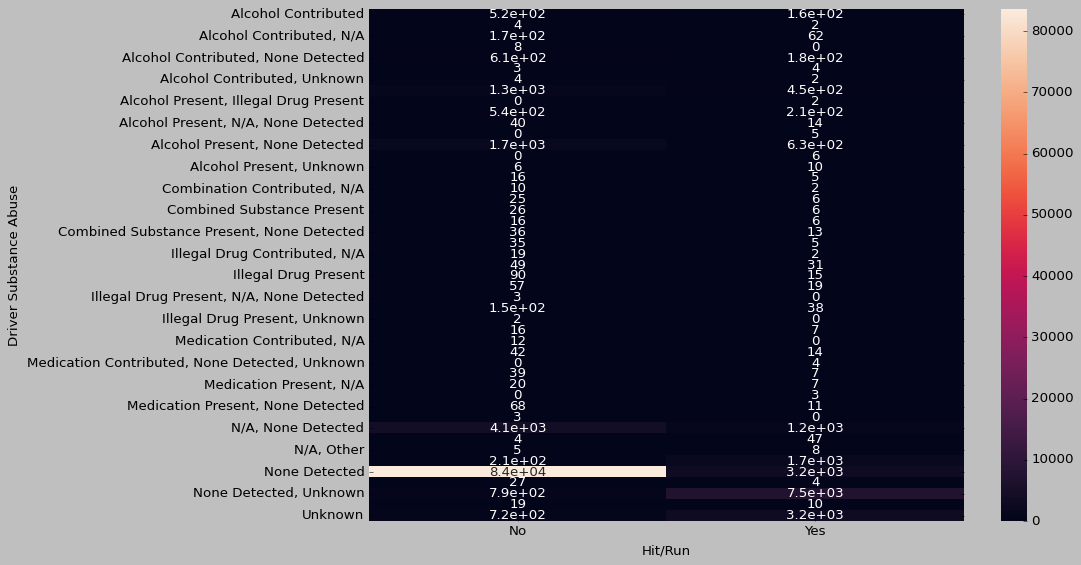

In [226]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency2, annot=True, cmap="rocket")


In [227]:
# Chi-square test of independence.
c, p2, dof, expected = chi2_contingency(contigency)
p2

2.6030144065672165e-56

In [228]:
if p2 > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

Probably dependent


Can't reject hypothesis.

Driverless vehicles is a strategy combat substance abuse driving and hit & runs.

In [229]:
#number of collisions by light of day 
mc_incidents['Light'].value_counts()

Daylight                    91374
Dark Lights On              30252
Dark No Lights               3953
Dusk                         3186
Dawn                         2676
Dark -- Unknown Lighting     1220
Unknown                       615
Other                         276
Name: Light, dtype: int64

In [230]:
light = mc_incidents['Light'].value_counts(normalize=True)

In [231]:
light

Daylight                    0.684183
Dark Lights On              0.226519
Dark No Lights              0.029599
Dusk                        0.023856
Dawn                        0.020037
Dark -- Unknown Lighting    0.009135
Unknown                     0.004605
Other                       0.002067
Name: Light, dtype: float64

In [232]:
light = light.rename(index={'Dark Lights On':'Dark: Lights On', 'Dark No Lights':'Dark: Lights On', 'Dark -- Unknown Lighting':'Dark: Unknown Lighting'})

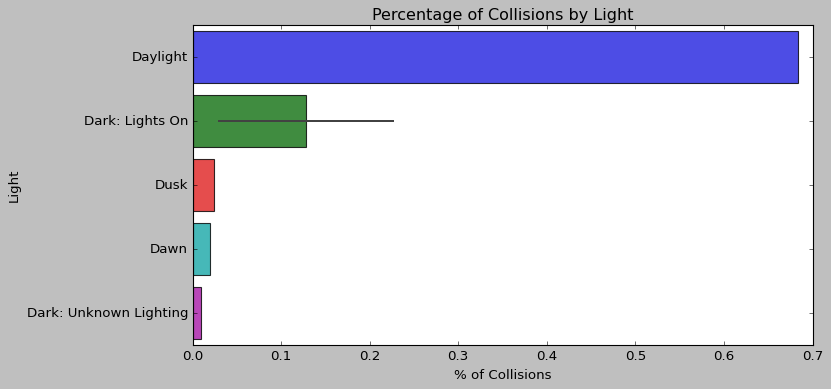

In [233]:
light = light[:6,]
plt.figure(figsize=(10,5))
sns.barplot(x=light.values, y=light.index, alpha=0.8)
plt.title('Percentage of Collisions by Light')
plt.ylabel('Light', fontsize=12)
plt.xlabel('% of Collisions', fontsize=12)
plt.show()



In [234]:
#weather breakdown of crashes
mc_incidents['Weather'].value_counts(normalize=True)

Clear                       0.727674
Raining                     0.131786
Cloudy                      0.112773
Snow                        0.010389
Unknown                     0.004610
Foggy                       0.004054
Wintry Mix                  0.002902
Other                       0.002345
Sleet                       0.001531
Severe Winds                0.001007
Blowing Snow                0.000806
Blowing Sand, Soil, Dirt    0.000121
Name: Weather, dtype: float64

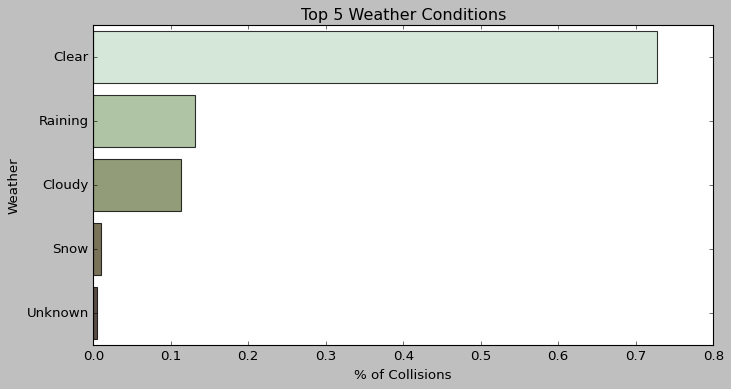

In [235]:
#graphing top 5 weather conditions
weather = mc_incidents['Weather'].value_counts(normalize=True)
weather = weather[:5,]
plt.figure(figsize=(10,5))
sns.barplot(x=weather.values, y=weather.index, alpha=0.8, palette="ch:.98")
plt.title('Top 5 Weather Conditions')
plt.ylabel('Weather', fontsize=12)
plt.xlabel('% of Collisions', fontsize=12)
plt.show()

Most accidents happyen by daylight during nice weather.

In [236]:
#removing timestamp from 'Crash Date/Time' column 
mc_incidents['Crash Date/Time'] = pd.to_datetime(mc_incidents['Crash Date/Time'], errors='coerce', utc=True).dt.strftime('%Y-%m-%d')

mc_incidents.head()

,Road Condition,Driver Substance Abuse,Surface Condition,Mile Point Direction,Road Alignment,Direction,Mile Point,Cross-Street Name,Road Name,Lane Direction,Weather,Light,Collision Type,Hit/Run,Crash Date/Time,ACRS Report Type,Agency Name,Location,Number of Lanes,Longitude,At Fault,Latitude,Report Number,Driver Distracted By,Injury Severity,Vehicle Model,Vehicle Make,Vehicle Year,Driverless Vehicle,Speed Limit,Vehicle Body Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Daylight,Single vehicle,No,2019-09-27,Property Damage Crash,Montgomery County Police,"(39.0267, -77.136785)",0,-77.136785,DRIVER,39.026700,MCP3048005T,Unknown,No Apparent Injury,Corolla,Toyota,2003.0,No,10.0,Passenger Car
1,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Daylight,Straight movement angle,Yes,2020-05-02,Property Damage Crash,Gaithersburg Police Depar,"(39.14795617, -77.2296164)",0,-77.229616,DRIVER,39.147956,EJ78460055,Unknown,No Apparent Injury,Expedition,Ford,1999.0,No,5.0,(Sport) Utility Vehicle
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Daylight,Straight movement angle,No,2020-09-15,Injury Crash,Montgomery County Police,"(39.18886167, -77.202455)",0,-77.202455,DRIVER,39.188862,MCP3245000H,Looked But Did Not See,No Apparent Injury,Sentra,Nissan,2016.0,No,15.0,Passenger Car
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Daylight,Straight movement angle,No,2020-09-15,Injury Crash,Montgomery County Police,"(39.18886167, -77.202455)",0,-77.202455,DRIVER,39.188862,MCP3245000H,Not Distracted,Suspected Minor Injury,Murano,Nissan,2012.0,No,15.0,Passenger Car
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daylight,NaN,No,2020-10-14,Property Damage Crash,Maryland-National Capital,"(39.15869731, -77.14679055)",0,-77.146791,UNKNOWN,39.158697,HA23890011,Not Distracted,No Apparent Injury,Tk,Ford,2016.0,No,10.0,"Medium/Heavy Trucks 3 Axles (Over 10,000Lbs (4..."


In [237]:
#splitting up date column to day month and year
mc_incidents[['Year', 'Month', 'Day']] = mc_incidents['Crash Date/Time'].str.split("-", expand = True)
pd.options.mode.chained_assignment = None  # default='warn'
mc_incidents.head()

,Road Condition,Driver Substance Abuse,Surface Condition,Mile Point Direction,Road Alignment,Direction,Mile Point,Cross-Street Name,Road Name,Lane Direction,Weather,Light,Collision Type,Hit/Run,Crash Date/Time,ACRS Report Type,Agency Name,Location,Number of Lanes,Longitude,At Fault,Latitude,Report Number,Driver Distracted By,Injury Severity,Vehicle Model,Vehicle Make,Vehicle Year,Driverless Vehicle,Speed Limit,Vehicle Body Type,Year,Month,Day
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Daylight,Single vehicle,No,2019-09-27,Property Damage Crash,Montgomery County Police,"(39.0267, -77.136785)",0,-77.136785,DRIVER,39.026700,MCP3048005T,Unknown,No Apparent Injury,Corolla,Toyota,2003.0,No,10.0,Passenger Car,2019,09,27
1,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Daylight,Straight movement angle,Yes,2020-05-02,Property Damage Crash,Gaithersburg Police Depar,"(39.14795617, -77.2296164)",0,-77.229616,DRIVER,39.147956,EJ78460055,Unknown,No Apparent Injury,Expedition,Ford,1999.0,No,5.0,(Sport) Utility Vehicle,2020,05,02
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Daylight,Straight movement angle,No,2020-09-15,Injury Crash,Montgomery County Police,"(39.18886167, -77.202455)",0,-77.202455,DRIVER,39.188862,MCP3245000H,Looked But Did Not See,No Apparent Injury,Sentra,Nissan,2016.0,No,15.0,Passenger Car,2020,09,15
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Daylight,Straight movement angle,No,2020-09-15,Injury Crash,Montgomery County Police,"(39.18886167, -77.202455)",0,-77.202455,DRIVER,39.188862,MCP3245000H,Not Distracted,Suspected Minor Injury,Murano,Nissan,2012.0,No,15.0,Passenger Car,2020,09,15
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daylight,NaN,No,2020-10-14,Property Damage Crash,Maryland-National Capital,"(39.15869731, -77.14679055)",0,-77.146791,UNKNOWN,39.158697,HA23890011,Not Distracted,No Apparent Injury,Tk,Ford,2016.0,No,10.0,"Medium/Heavy Trucks 3 Axles (Over 10,000Lbs (4...",2020,10,14


In [238]:
mc_incidents['Month'] = mc_incidents['Month'].astype(str).astype(int)

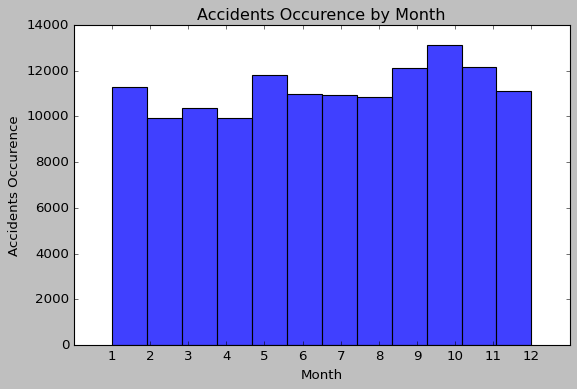

In [239]:
fig, mth = plt.subplots(figsize=(8,5))
sns.histplot(mc_incidents['Month'], bins = 12)

plt.xlabel("Month")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month')
mth.set_xlim(0,13)
mth.set_xticks(range(1,13))
plt.show()

In [240]:
Most accidents happen from September through November.  This indicates there's a possible seasonal connection to accidents.  Maybe due to the weather changes?

Object `changes` not found.


Hypothosis:  Weather and Crash Type are Independent

In [241]:
from scipy.stats import chi2_contingency

contigency= pd.crosstab(mc_incidents['Weather'], mc_incidents['ACRS Report Type'])
contigency

ACRS Report Type,Fatal Crash,Injury Crash,Property Damage Crash
Weather,,,
"Blowing Sand, Soil, Dirt",0,9,6
Blowing Snow,0,40,60
Clear,244,33347,56693
Cloudy,20,5441,8531
Foggy,1,195,307
Other,0,89,202
Raining,21,6372,9958
Severe Winds,3,43,79
Sleet,0,62,128


In [242]:
contigency_pct = pd.crosstab(mc_incidents['Weather'], mc_incidents['ACRS Report Type'], normalize='index')
contigency_pct

ACRS Report Type,Fatal Crash,Injury Crash,Property Damage Crash
Weather,,,
"Blowing Sand, Soil, Dirt",0.000000,0.600000,0.400000
Blowing Snow,0.000000,0.400000,0.600000
Clear,0.002703,0.369357,0.627941
Cloudy,0.001429,0.388865,0.609706
Foggy,0.001988,0.387674,0.610338
Other,0.000000,0.305842,0.694158
Raining,0.001284,0.389701,0.609015
Severe Winds,0.024000,0.344000,0.632000
Sleet,0.000000,0.326316,0.673684


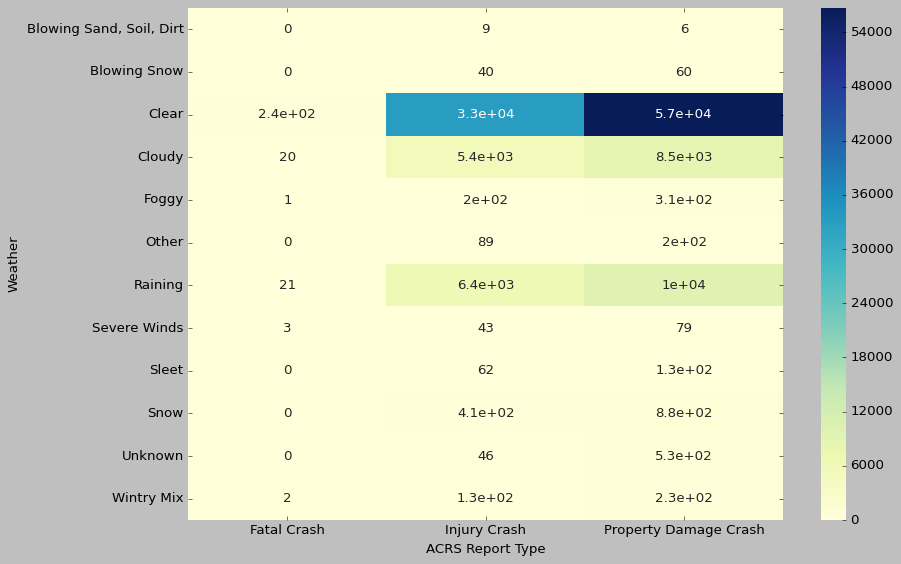

In [243]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [244]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
p

2.6030144065672165e-56

In [245]:
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

Probably dependent


Reject the hypothosis

In [246]:
# counting crashes by year
mc_incidents.groupby(['Year']).count()

,Road Condition,Driver Substance Abuse,Surface Condition,Mile Point Direction,Road Alignment,Direction,Mile Point,Cross-Street Name,Road Name,Lane Direction,Weather,Light,Collision Type,Hit/Run,Crash Date/Time,ACRS Report Type,Agency Name,Location,Number of Lanes,Longitude,At Fault,Latitude,Report Number,Driver Distracted By,Injury Severity,Vehicle Model,Vehicle Make,Vehicle Year,Driverless Vehicle,Speed Limit,Vehicle Body Type,Month,Day
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,17930,17756,18035,18554,18493,18578,18578,18590,18591,18593,19178,20280,20374,20421,20423,20423,20423,20423,20423,20423,20423,20423,20423,20283,20283,20265,20270,20283,20283,20283,20205,20423,20423
2016,19172,18997,19270,19759,19784,19866,19866,19864,19866,19866,20458,21648,21762,21846,21846,21846,21846,21846,21846,21846,21846,21846,21846,21776,21776,21773,21775,21776,21776,21776,21398,21846,21846
2017,18897,18361,19010,19461,19482,19561,19561,19561,19561,19561,19569,21434,21545,21620,21620,21620,21620,21620,21620,21620,21620,21620,21620,21541,21541,21535,21540,21541,21541,21541,21172,21620,21620
2018,18086,17270,18556,19045,19074,19154,19154,19153,19154,19154,19268,20899,20993,21080,21080,21080,21080,21080,21080,21080,21080,21080,21080,21039,21039,21028,21037,21039,21039,21039,20697,21080,21080
2019,17940,16987,18402,18860,18881,18974,18974,18974,18974,18974,19109,20815,20934,21000,21000,21000,21000,21000,21000,21000,21000,21000,21000,20938,20938,20926,20935,20938,20938,20938,20609,21000,21000
2020,11972,12006,12227,12393,12455,12497,12497,12496,12497,12497,12730,13752,13806,13853,13853,13853,13853,13853,13853,13853,13853,13853,13853,13806,13806,13802,13805,13806,13806,13806,13572,13853,13853
2021,12981,12658,13122,13296,13353,13403,13403,13403,13403,13403,13760,14724,14824,14872,14872,14872,14872,14872,14872,14872,14872,14872,14872,14826,14826,14824,14825,14826,14826,14826,14577,14872,14872


In [247]:
# sorting by year
mc_incidents = mc_incidents.sort_values('Year')

In [248]:
# quick check to see if all instances are included 
year = mc_incidents['Year'].value_counts()
year

2016    21846
2017    21620
2018    21080
2019    21000
2015    20423
2021    14872
2020    13853
Name: Year, dtype: int64

In [249]:
##sorting by year
year = year.sort_index()
year

2015    20423
2016    21846
2017    21620
2018    21080
2019    21000
2020    13853
2021    14872
Name: Year, dtype: int64

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


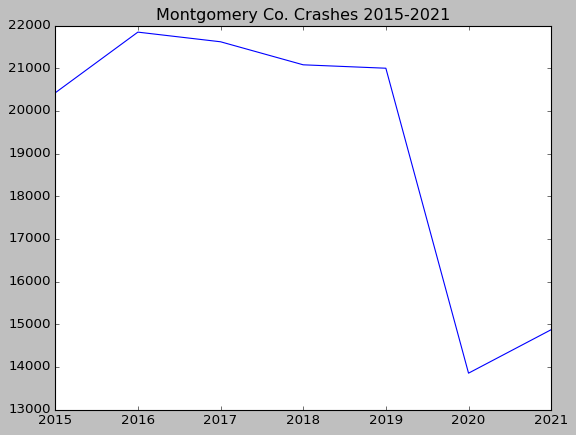

In [250]:
#line plot for all crashes 2015-2021
sns.lineplot(y=year.values, x=year.index, data=year, sort=False)
plt.title('Montgomery Co. Crashes 2015-2021')
plt.show;


In [251]:
from numpy import polyfit

In [252]:
year2 = mc_incidents.groupby(['Year']).size().reset_index(name='Crash Count')
year2.dtypes

Year           object
Crash Count     int64
dtype: object

In [253]:
year2['Year'] = year2['Year'].astype(str).astype(int)

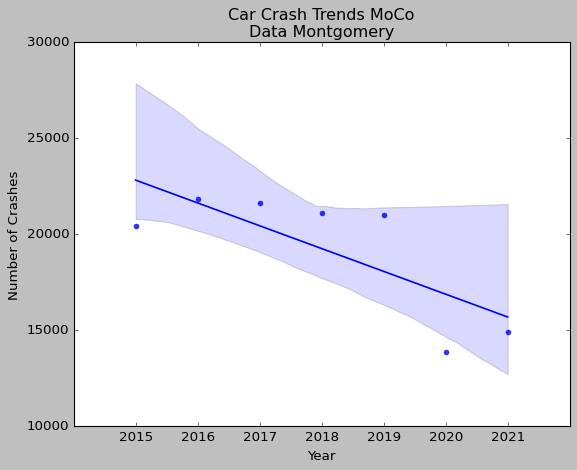

In [254]:
#scatter plot with trend lines for all crashes 2015-2021
trend = sns.regplot(x='Year',y='Crash Count', data=year2, fit_reg=True)
plt.title('Car Crash Trends MoCo\nData Montgomery')
# Set x-axis label
plt.xlabel('Year')
# Set y-axis label
plt.ylabel('Number of Crashes')
trend.set_xticklabels(['','2015','2016','2017', '2018', '2019', '2020', '2021']) #rename ticks 
plt.show()

In [255]:
#filtering for 2021
mo_type = mc_incidents[["ACRS Report Type",'Year', 'Month', 'Report Number']]
mo_type = mo_type.loc[(mo_type['Year'] == '2021')]
mo_type.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 129668 to 134693
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ACRS Report Type  14872 non-null  object
 1   Year              14872 non-null  object
 2   Month             14872 non-null  int64 
 3   Report Number     14872 non-null  object
dtypes: int64(1), object(3)
memory usage: 580.9+ KB


In [256]:
yr_coltype = mc_incidents[["ACRS Report Type",'Year', 'Report Number']]
#.groupby(["ACRS Report Type",'Year']).value_counts()
yr_coltype

#Airports[['Dom_Pax_in','Dom_Pax_Out', 'Year_Ended_December']].groupby(['Year_Ended_December']).sum()
#df.groupby(['Year'])['Global_Sales'].sum().plot()

,ACRS Report Type,Year,Report Number
60394,Property Damage Crash,2015,MCP29290012
19889,Property Damage Crash,2015,MCP2882001D
99574,Property Damage Crash,2015,MCP1522000H
55689,Injury Crash,2015,MCP2749000Z
55690,Injury Crash,2015,MCP2749000Z
...,...,...,...
124764,Injury Crash,2021,MCP3158003B
124765,Injury Crash,2021,MCP3122003W
124766,Injury Crash,2021,MCP3122003W
124754,Property Damage Crash,2021,MCP2475005W


In [257]:
#grouping by year, report type, and counting number of each type
yr_coltype_count = yr_coltype.groupby(['ACRS Report Type','Year'])['Report Number'].count()
yr_coltype_count = pd.DataFrame(yr_coltype_count)

In [258]:
yr_coltype_count

Report Number
ACRS Report Type      Year               
Fatal Crash           2015             45
                      2016             44
                      2017             42
                      2018             39
                      2019             44
                      2020             55
                      2021             47
Injury Crash          2015           7851
                      2016           8418
                      2017           8141
                      2018           7910
                      2019           7651
                      2020           4829
                      2021           5058
Property Damage Crash 2015          12527
                      2016          13384
                      2017          13437
                      2018          13131
                      2019          13305
                      2020           8969
                      2021           9767

In [259]:
#adding mean of all years
#yr_coltype_count.loc['mean'] = yr_coltype_count.mean()
#yr_coltype_count

In [260]:
yr_coltype_count = yr_coltype.groupby(['ACRS Report Type','Year']).size().reset_index(name='Crash Count')
yr_coltype_count

,ACRS Report Type,Year,Crash Count
0,Fatal Crash,2015,45
1,Fatal Crash,2016,44
2,Fatal Crash,2017,42
3,Fatal Crash,2018,39
4,Fatal Crash,2019,44
5,Fatal Crash,2020,55
6,Fatal Crash,2021,47
7,Injury Crash,2015,7851
8,Injury Crash,2016,8418
9,Injury Crash,2017,8141


Text(0.5, 1.0, 'Frequency Count Crash by Type')

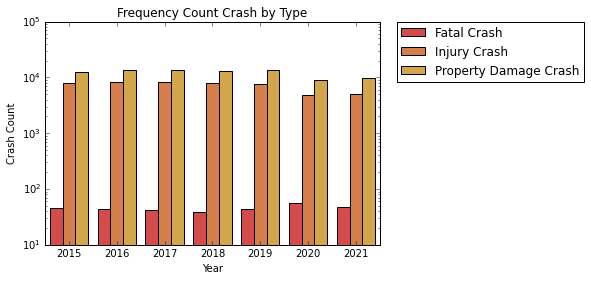

In [365]:
ax = sns.barplot(x='Year', y='Crash Count', hue='ACRS Report Type', data=yr_coltype_count, palette=['#eb3434', '#eb7a34', '#ebae34'])
ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.title("Frequency Count Crash by Type")
#need to adjust y label

In [262]:
yr_counts = mc_incidents.groupby(['Year', 'ACRS Report Type']).size().reset_index(name='counts')
yr_counts

property = yr_counts[yr_counts['ACRS Report Type'].str.contains("Property Damage Crash")]
injury = yr_counts[yr_counts['ACRS Report Type'].str.contains("Injury Crash")]
fatal = yr_counts[yr_counts['ACRS Report Type'].str.contains("Fatal Crash")]

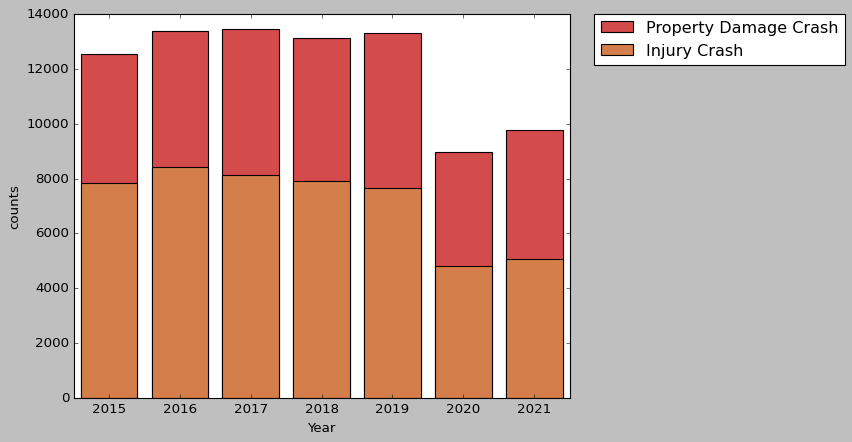

In [263]:
sns.barplot(x='Year', y='counts', data=property, palette=['#eb3434'], hue='ACRS Report Type')
sns.barplot(x='Year', y='counts', data=injury, palette=['#eb7a34'], hue='ACRS Report Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


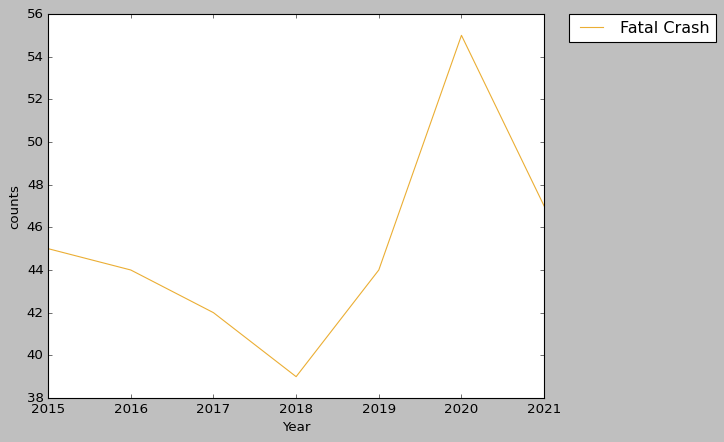

In [264]:
sns.lineplot(x='Year', y='counts', data=fatal, palette=['#ebae34'], hue='ACRS Report Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [265]:
mc_incidents['At Fault'].value_counts(normalize=True)*100

DRIVER         94.802293
UNKNOWN         4.353572
NONMOTORIST     0.737969
BOTH            0.106167
Name: At Fault, dtype: float64

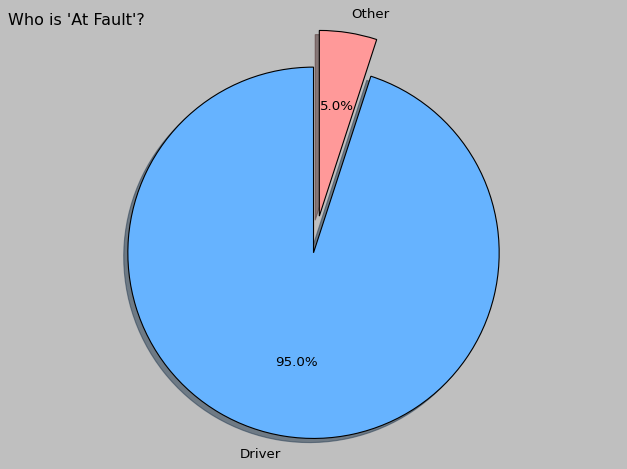

In [266]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Driver', 'Other'
sizes = [95, 5]
explode = (0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Driver')
colors = ['#66b3ff', '#ff9999']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Who is 'At Fault'?", loc='left')
plt.tight_layout()
plt.show()

In [267]:
#filter for just 2021 fatal crashes
mc_crash2 = mc_incidents.loc[(mc_incidents['Year'] == '2021')]
mc_crash2 = mc_crash2.loc[(mc_crash2['ACRS Report Type'] == 'Fatal Crash')]
mc_crash2

,Road Condition,Driver Substance Abuse,Surface Condition,Mile Point Direction,Road Alignment,Direction,Mile Point,Cross-Street Name,Road Name,Lane Direction,Weather,Light,Collision Type,Hit/Run,Crash Date/Time,ACRS Report Type,Agency Name,Location,Number of Lanes,Longitude,At Fault,Latitude,Report Number,Driver Distracted By,Injury Severity,Vehicle Model,Vehicle Make,Vehicle Year,Driverless Vehicle,Speed Limit,Vehicle Body Type,Year,Month,Day
130747,No Defects,Unknown,DRY,North,Straight,South,7.350,Wolf Dr,New Hampshire Ave,North,Clear,Dark Lights On,Single vehicle,No,2021-07-22,Fatal Crash,Montgomery County Police,"(39.07345, -77.00261667)",3,-77.002617,DRIVER,39.073450,MCP25630014,Unknown,Fatal Injury,Tl,Acura,2008.0,No,40.0,Passenger Car,2021,7,22
130216,No Defects,Unknown,DRY,North,Curve Right,North,9.180,Spur Fr Md 28,Rockville Pike,North,Clear,Dark Lights On,Single vehicle,No,2021-06-26,Fatal Crash,Montgomery County Police,"(39.08206516, -77.14624799)",3,-77.146248,DRIVER,39.082065,MCP1227001C,Unknown,Fatal Injury,C230,Merz,2005.0,No,30.0,Passenger Car,2021,6,26
127736,No Defects,Unknown,DRY,West,Curve Right,West,0.340,Hatteras Way,Park Vista Dr,East,Clear,Daylight,Head on,No,2021-05-21,Fatal Crash,Montgomery County Police,"(39.102555, -77.04604333)",2,-77.046043,DRIVER,39.102555,MCP1301001L,Not Distracted,Fatal Injury,Avalon,Toyota,2018.0,No,25.0,Passenger Car,2021,5,21
127970,NaN,Unknown,WET,North,Straight,South,3.460,Powder Mill Rd,New Hampshire Ave,South,Raining,Dark Lights On,Single vehicle,Yes,2021-01-15,Fatal Crash,Montgomery County Police,"(39.02128333, -76.97695)",3,-76.976950,UNKNOWN,39.021283,MCP1301001J,No Driver Present,No Apparent Injury,Unknown,Unknown,0.0,No,40.0,NaN,2021,1,15
128702,No Defects,Combination Contributed,DRY,North,Curve Left,North,2.430,Prince Georges Co/L,Greencastle Rd,South,Clear,Daylight,Single vehicle,No,2021-04-03,Fatal Crash,Montgomery County Police,"(39.07688901, -76.92895491)",1,-76.928955,DRIVER,39.076889,MCP1227001B,Unknown,Fatal Injury,200,Chrysler,2016.0,No,30.0,Passenger Car,2021,4,03
128351,NaN,None Detected,DRY,East,Straight,East,10.440,Spur Fr Orchard Hills Dr,Clopper Rd,East,Clear,Dark Lights On,Head on,No,2021-04-18,Fatal Crash,Montgomery County Police,"(39.14779668, -77.23462455)",5,-77.234625,DRIVER,39.147797,MCP2001001J,Not Distracted,Possible Injury,Altima,Nissan,2018.0,No,35.0,Passenger Car,2021,4,18
128352,NaN,None Detected,DRY,East,Straight,East,10.440,Spur Fr Orchard Hills Dr,Clopper Rd,East,Clear,Dark Lights On,Head on,No,2021-04-18,Fatal Crash,Montgomery County Police,"(39.14779668, -77.23462455)",5,-77.234625,DRIVER,39.147797,MCP2001001J,Unknown,Fatal Injury,Malibu,Chevrolet,2018.0,No,35.0,Passenger Car,2021,4,18
128396,No Defects,Unknown,DRY,East,Straight,East,0.000,Mt Ephraim Rd,Barnesville Rd,West,Clear,Daylight,Single vehicle,No,2021-09-16,Fatal Crash,Montgomery County Police,"(39.22732833, -77.406625)",2,-77.406625,DRIVER,39.227328,MCP1301001N,Unknown,Fatal Injury,3,Mazda,2010.0,No,40.0,Passenger Car,2021,9,16
128244,No Defects,"Illegal Drug Present, N/A",DRY,North,Straight,North,18.810,Germantown Rd,Frederick Rd,South,Clear,Daylight,Same direction rear end,No,2021-03-15,Fatal Crash,Montgomery County Police,"(39.19266333, -77.242895)",2,-77.242895,DRIVER,39.192663,MCP3285000K,Unknown,Fatal Injury,Accord,Honda,2019.0,No,45.0,Passenger Car,2021,3,15
128245,No Defects,"Illegal Drug Present, N/A",DRY,North,Straight,North,18.810,Germantown Rd,Frederick Rd,South,Clear,Daylight,Same direction rear end,No,2021-03-15,Fatal Crash,Montgomery County Police,"(39.19266333, -77.242895)",2,-77.242895,DRIVER,39.192663,MCP3285000K,Unknown,Possible Injury,550,Ford,2015.0,No,45.0,"Medium/Heavy Trucks 3 Axles (Over 10,000Lbs (4...",2021,3,15


In [268]:
#trim data frame
map = mc_crash2[["Latitude","Longitude", "ACRS Report Type"]]
#create baseline map
crash_map = folium.Map(location=[39.1400, -77.2000], zoom_start=10,control_scale=True)
heatmap_layer = HeatMap(
    list(zip(map.Latitude.values, map.Longitude.values)),
    min_opacity=0.2,
    radius=17, 
    blur=15, 
    max_zoom=1,)

heatmap_layer.add_to(crash_map)

crash_map

In [269]:
# add marker one by one on the map
#for i in range(0,len(map)):
 #  folium.Marker(
  #    location=[map.iloc[i]['Latitude'], map.iloc[i]['Longitude']],
   #   popup=map.iloc[i]['ACRS Report Type'],
   #).add_to(crash_map)

# Show the map again
#crash_map

In [270]:
mc_incidents.head()

,Road Condition,Driver Substance Abuse,Surface Condition,Mile Point Direction,Road Alignment,Direction,Mile Point,Cross-Street Name,Road Name,Lane Direction,Weather,Light,Collision Type,Hit/Run,Crash Date/Time,ACRS Report Type,Agency Name,Location,Number of Lanes,Longitude,At Fault,Latitude,Report Number,Driver Distracted By,Injury Severity,Vehicle Model,Vehicle Make,Vehicle Year,Driverless Vehicle,Speed Limit,Vehicle Body Type,Year,Month,Day
60394,No Defects,None Detected,DRY,North,Straight,North,9.73,Norwood Rd,New Hampshire Ave,South,Clear,Daylight,Head on left turn,No,2015-10-12,Property Damage Crash,Montgomery,"(39.10593167, -77.00141833)",2,-77.001418,DRIVER,39.105932,MCP29290012,Not Distracted,No Apparent Injury,2S,Merz,1999.0,No,45.0,Passenger Car,2015,10,12
19889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Daylight,Single vehicle,No,2015-11-04,Property Damage Crash,Montgomery,"(39.185735, -77.26446)",0,-77.264460,DRIVER,39.185735,MCP2882001D,Not Distracted,No Apparent Injury,Interceptor,Ford,2014.0,No,25.0,Police Vehicle/Emergency,2015,11,04
99574,No Defects,NaN,DRY,North,Curve Left,North,3.35,Cedar Grove Elementary School,Ridge Rd,North,Cloudy,Daylight,Opposite direction sideswipe,No,2015-05-11,Property Damage Crash,Montgomery County Police,"(39.24943167, -77.23372)",2,-77.233720,DRIVER,39.249432,MCP1522000H,Other Electronic Device (Navigational Palm Pilot),No Apparent Injury,F-250,Ford,2014.0,No,40.0,Passenger Car,2015,5,11
55689,No Defects,None Detected,DRY,East,Straight,East,2.42,Inwood Ave,University Blvd W,West,Clear,Dark Lights On,Head on left turn,No,2015-09-10,Injury Crash,Montgomery,"(39.036, -77.036)",3,-77.036000,DRIVER,39.036000,MCP2749000Z,Not Distracted,Possible Injury,Mc1,Yama,2003.0,No,35.0,Motorcycle,2015,9,10
55690,No Defects,None Detected,DRY,East,Straight,East,2.42,Inwood Ave,University Blvd W,West,Clear,Dark Lights On,Head on left turn,No,2015-09-10,Injury Crash,Montgomery,"(39.036, -77.036)",3,-77.036000,DRIVER,39.036000,MCP2749000Z,Looked But Did Not See,No Apparent Injury,4S,Scio,2006.0,No,35.0,Passenger Car,2015,9,10


In [271]:
mc_incidents2 = mc_incidents[['ACRS Report Type', 'Driver Substance Abuse', 'Surface Condition', 'Mile Point Direction', 'Road Alignment', 
                             'Direction',	'Mile Point',	'Lane Direction',	'Weather', 	'Light',	'Location',	
                             'Number of Lanes',	'At Fault','Longitude',	'Latitude',	'Driver Distracted By',	
                             'Vehicle Year', 'Speed Limit',	'Year', 'Month']]

In [272]:
mc_incidents2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134694 entries, 60394 to 134693
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ACRS Report Type        134694 non-null  object 
 1   Driver Substance Abuse  114035 non-null  object 
 2   Surface Condition       118622 non-null  object 
 3   Mile Point Direction    121368 non-null  object 
 4   Road Alignment          121522 non-null  object 
 5   Direction               122033 non-null  object 
 6   Mile Point              122033 non-null  float64
 7   Lane Direction          122048 non-null  object 
 8   Weather                 124072 non-null  object 
 9   Light                   133552 non-null  object 
 10  Location                134694 non-null  object 
 11  Number of Lanes         134694 non-null  int64  
 12  At Fault                134694 non-null  object 
 13  Longitude               134694 non-null  float64
 14  Latitude        

In [273]:
mc_incidents2.isna().sum().sort_values(ascending = False)

Driver Substance Abuse    20659
Surface Condition         16072
Mile Point Direction      13326
Road Alignment            13172
Direction                 12661
Mile Point                12661
Lane Direction            12646
Weather                   10622
Light                      1142
Speed Limit                 485
Vehicle Year                485
Driver Distracted By        485
Month                         0
Year                          0
Location                      0
Number of Lanes               0
At Fault                      0
Longitude                     0
Latitude                      0
ACRS Report Type              0
dtype: int64

In [274]:
mc_incidents2['Driver Substance Abuse'].unique()

array(['None Detected', nan, 'Unknown', 'None Detected, Unknown',
       'Alcohol Present', 'N/A, None Detected', 'N/A, Unknown',
       'Alcohol Present, N/A', 'Alcohol Contributed',
       'Medication Contributed', 'Combined Substance Present',
       'Alcohol Contributed, None Detected',
       'Alcohol Present, None Detected', 'Medication Present', 'Other',
       'Illegal Drug Contributed, None Detected',
       'Medication Present, None Detected',
       'Alcohol Contributed, Alcohol Present',
       'Alcohol Present, N/A, None Detected',
       'Illegal Drug Present, None Detected',
       'Combined Substance Present, N/A', 'Alcohol Contributed, N/A',
       'Illegal Drug Present', 'Combination Contributed, N/A',
       'Medication Present, None Detected, Unknown',
       'Medication Contributed, None Detected', 'Combination Contributed',
       'Illegal Drug Contributed', 'Medication Present, N/A',
       'Illegal Drug Present, N/A', 'None Detected, Other',
       'N/A, None De

In [275]:
from sklearn_pandas import CategoricalImputer

In [276]:
#removing 'nan' and replacing with most common value for each variable
data = mc_incidents2.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [277]:
#creating data dict for substance abuse.  0 equals no substance, 1 equals substance
substance = {'None Detected': 0, 'N/A, None Detected':0, 'None Detected, Unknown':0,
       'N/A, Unknown':0, 'Alcohol Present':1, 'Illegal Drug Contributed':1,
       'Medication Present, N/A':0, 'Unknown':0, 'Medication Contributed':1,
       'Alcohol Present, None Detected':0, 'Alcohol Contributed':1,
       'Alcohol Present, N/A':0, 'Illegal Drug Present':1,
       'Alcohol Contributed, None Detected':0,
       'Combination Contributed, None Detected':0,
       'Illegal Drug Present, None Detected':0, 'Alcohol Contributed, N/A':0,
       'Medication Present, None Detected':0,
       'Illegal Drug Contributed, None Detected':0,
       'N/A, None Detected, Unknown':0, 'None Detected, Other':0,
       'Illegal Drug Present, N/A':0,
       'Medication Contributed, None Detected':0,
       'Alcohol Present, N/A, None Detected':0,
       'Combined Substance Present, N/A':0,
       'Alcohol Contributed, Alcohol Present':1, 'Combination Contributed':1,
       'Combined Substance Present':1,
       'Combined Substance Present, None Detected':0,
       'Illegal Drug Contributed, N/A':0, 'Other':1, 'Medication Present':1,
       'Alcohol Contributed, N/A, None Detected':0,
       'Illegal Drug Present, Unknown':1,
       'Alcohol Contributed, None Detected, Unknown':0,
       'Medication Present, None Detected, Unknown':0,
       'Combination Contributed, N/A':0, 'Alcohol Contributed, Unknown':0,
       'Alcohol Present, N/A, Unknown':0, 'Alcohol Present, Unknown':0,
       'Illegal Drug Present, N/A, None Detected':0,
       'Medication Contributed, N/A':0,
       'Medication Contributed, None Detected, Unknown':0,
       'Medication Present, N/A, Unknown':0, 'N/A, Other':0,
       'Alcohol Present, Illegal Drug Present':1,
       'Alcohol Present, None Detected, Unknown':0}

  
# traversing through dataframe
# values where key matches
data['Driver Substance Abuse'] = [substance[item] for item in data['Driver Substance Abuse']]

data.head()

,ACRS Report Type,Driver Substance Abuse,Surface Condition,Mile Point Direction,Road Alignment,Direction,Mile Point,Lane Direction,Weather,Light,Location,Number of Lanes,At Fault,Longitude,Latitude,Driver Distracted By,Vehicle Year,Speed Limit,Year,Month
60394,Property Damage Crash,0,DRY,North,Straight,North,9.73,South,Clear,Daylight,"(39.10593167, -77.00141833)",2,DRIVER,-77.001418,39.105932,Not Distracted,1999.0,45.0,2015,10
19889,Property Damage Crash,0,DRY,North,Straight,North,0.00,North,Clear,Daylight,"(39.185735, -77.26446)",0,DRIVER,-77.264460,39.185735,Not Distracted,2014.0,25.0,2015,11
99574,Property Damage Crash,0,DRY,North,Curve Left,North,3.35,North,Cloudy,Daylight,"(39.24943167, -77.23372)",2,DRIVER,-77.233720,39.249432,Other Electronic Device (Navigational Palm Pilot),2014.0,40.0,2015,5
55689,Injury Crash,0,DRY,East,Straight,East,2.42,West,Clear,Dark Lights On,"(39.036, -77.036)",3,DRIVER,-77.036000,39.036000,Not Distracted,2003.0,35.0,2015,9
55690,Injury Crash,0,DRY,East,Straight,East,2.42,West,Clear,Dark Lights On,"(39.036, -77.036)",3,DRIVER,-77.036000,39.036000,Looked But Did Not See,2006.0,35.0,2015,9


In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134694 entries, 60394 to 134693
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ACRS Report Type        134694 non-null  object 
 1   Driver Substance Abuse  134694 non-null  int64  
 2   Surface Condition       134694 non-null  object 
 3   Mile Point Direction    134694 non-null  object 
 4   Road Alignment          134694 non-null  object 
 5   Direction               134694 non-null  object 
 6   Mile Point              134694 non-null  float64
 7   Lane Direction          134694 non-null  object 
 8   Weather                 134694 non-null  object 
 9   Light                   134694 non-null  object 
 10  Location                134694 non-null  object 
 11  Number of Lanes         134694 non-null  int64  
 12  At Fault                134694 non-null  object 
 13  Longitude               134694 non-null  float64
 14  Latitude        

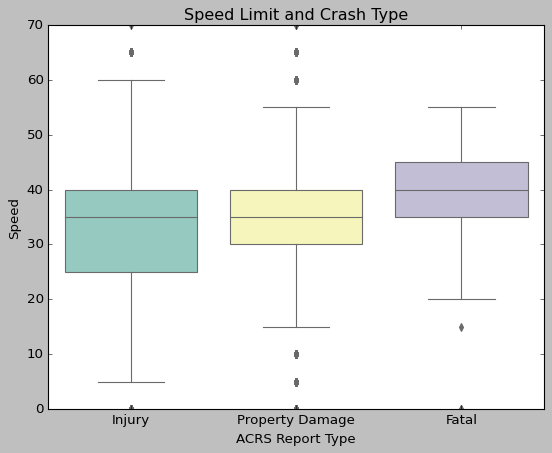

In [279]:
ax=sns.boxplot(y='Speed Limit', x='ACRS Report Type', data=data, palette="Set3")
ax.set_title('Speed Limit and Crash Type')
ax.set_ylabel('Speed')
ax.set_xticklabels(labels=['Injury', 'Property Damage', 'Fatal'])
plt.show()
#nova here.  would avg speed be the same across these different crash types.  null hyp would be the same

Median speed for Injuy and Property crashes are about the same around 35mph, with fatal crashes averaging 40mph.  Property Damage and Fatal look like normal distributions with Injury left skewed.

Null hypothesis: Groups means are equal (no variation in means of groups)

In [280]:
speed_crash = mc_incidents[['ACRS Report Type','Speed Limit']]
speed_crash.rename(columns={'Speed Limit': 'Speed', 'ACRS Report Type': 'Crash_Type'}, inplace=True)

In [281]:
import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# generate model for linear regression
my_model = ols(formula='Speed ~ Crash_Type', data = speed_crash)

# fit model to data to obtain parameter estimates
my_model_fit = my_model.fit()

# print summary of linear regression
print(my_model_fit.summary())

# show anova table
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                  Speed   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1563.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:05:59   Log-Likelihood:            -5.1137e+05
No. Observations:              134209   AIC:                         1.023e+06
Df Residuals:                  134206   BIC:                         1.023e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [282]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data['Crash Type2'] = lb_make.fit_transform(data['ACRS Report Type'])
data['Surface Condition2'] = lb_make.fit_transform(data['Surface Condition'])
data['Mile Point Direction2'] = lb_make.fit_transform(data['Mile Point Direction'])
data['Road Alignment2'] = lb_make.fit_transform(data['Road Alignment'])
data['Direction2'] = lb_make.fit_transform(data['Direction'])
data['Lane Direction2'] = lb_make.fit_transform(data['Lane Direction'])
data['Weather2'] = lb_make.fit_transform(data['Weather'])
data['Light2'] = lb_make.fit_transform(data['Light']) 
data['At Fault2'] = lb_make.fit_transform(data['At Fault']) 
data['Driver Distracted By2'] = lb_make.fit_transform(data['Driver Distracted By'])  
data['Driver Distracted By2'] = lb_make.fit_transform(data['Driver Distracted By'])                                                                    
data.head()

,ACRS Report Type,Driver Substance Abuse,Surface Condition,Mile Point Direction,Road Alignment,Direction,Mile Point,Lane Direction,Weather,Light,Location,Number of Lanes,At Fault,Longitude,Latitude,Driver Distracted By,Vehicle Year,Speed Limit,Year,Month,Crash Type2,Surface Condition2,Mile Point Direction2,Road Alignment2,Direction2,Lane Direction2,Weather2,Light2,At Fault2,Driver Distracted By2
60394,Property Damage Crash,0,DRY,North,Straight,North,9.73,South,Clear,Daylight,"(39.10593167, -77.00141833)",2,DRIVER,-77.001418,39.105932,Not Distracted,1999.0,45.0,2015,10,2,0,1,3,1,2,2,4,1,9
19889,Property Damage Crash,0,DRY,North,Straight,North,0.00,North,Clear,Daylight,"(39.185735, -77.26446)",0,DRIVER,-77.264460,39.185735,Not Distracted,2014.0,25.0,2015,11,2,0,1,3,1,1,2,4,1,9
99574,Property Damage Crash,0,DRY,North,Curve Left,North,3.35,North,Cloudy,Daylight,"(39.24943167, -77.23372)",2,DRIVER,-77.233720,39.249432,Other Electronic Device (Navigational Palm Pilot),2014.0,40.0,2015,5,2,0,1,0,1,1,3,4,1,12
55689,Injury Crash,0,DRY,East,Straight,East,2.42,West,Clear,Dark Lights On,"(39.036, -77.036)",3,DRIVER,-77.036000,39.036000,Not Distracted,2003.0,35.0,2015,9,1,0,0,3,0,4,2,1,1,9
55690,Injury Crash,0,DRY,East,Straight,East,2.42,West,Clear,Dark Lights On,"(39.036, -77.036)",3,DRIVER,-77.036000,39.036000,Looked But Did Not See,2006.0,35.0,2015,9,1,0,0,3,0,4,2,1,1,7


In [283]:
data = data[['Crash Type2','Driver Substance Abuse', 'Surface Condition2', 'Mile Point Direction2', 'Road Alignment2', 
                             'Direction2',	'Mile Point',	'Lane Direction2',	'Weather2', 	'Light2',	
                             'Number of Lanes',	'At Fault2','Longitude',	'Latitude',	'Driver Distracted By2',	
                             'Vehicle Year', 'Speed Limit',	'Year', 'Month']]

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134694 entries, 60394 to 134693
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Crash Type2             134694 non-null  int64  
 1   Driver Substance Abuse  134694 non-null  int64  
 2   Surface Condition2      134694 non-null  int64  
 3   Mile Point Direction2   134694 non-null  int64  
 4   Road Alignment2         134694 non-null  int64  
 5   Direction2              134694 non-null  int64  
 6   Mile Point              134694 non-null  float64
 7   Lane Direction2         134694 non-null  int64  
 8   Weather2                134694 non-null  int64  
 9   Light2                  134694 non-null  int64  
 10  Number of Lanes         134694 non-null  int64  
 11  At Fault2               134694 non-null  int64  
 12  Longitude               134694 non-null  float64
 13  Latitude                134694 non-null  float64
 14  Driver Distracte

In [285]:
#changing dates to numeric
data[['Year', 'Month']] = data[['Year', 'Month']].astype(str).astype(int)

In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134694 entries, 60394 to 134693
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Crash Type2             134694 non-null  int64  
 1   Driver Substance Abuse  134694 non-null  int64  
 2   Surface Condition2      134694 non-null  int64  
 3   Mile Point Direction2   134694 non-null  int64  
 4   Road Alignment2         134694 non-null  int64  
 5   Direction2              134694 non-null  int64  
 6   Mile Point              134694 non-null  float64
 7   Lane Direction2         134694 non-null  int64  
 8   Weather2                134694 non-null  int64  
 9   Light2                  134694 non-null  int64  
 10  Number of Lanes         134694 non-null  int64  
 11  At Fault2               134694 non-null  int64  
 12  Longitude               134694 non-null  float64
 13  Latitude                134694 non-null  float64
 14  Driver Distracte

In [287]:
data.head()

,Crash Type2,Driver Substance Abuse,Surface Condition2,Mile Point Direction2,Road Alignment2,Direction2,Mile Point,Lane Direction2,Weather2,Light2,Number of Lanes,At Fault2,Longitude,Latitude,Driver Distracted By2,Vehicle Year,Speed Limit,Year,Month
60394,2,0,0,1,3,1,9.73,2,2,4,2,1,-77.001418,39.105932,9,1999.0,45.0,2015,10
19889,2,0,0,1,3,1,0.00,1,2,4,0,1,-77.264460,39.185735,9,2014.0,25.0,2015,11
99574,2,0,0,1,0,1,3.35,1,3,4,2,1,-77.233720,39.249432,12,2014.0,40.0,2015,5
55689,1,0,0,0,3,0,2.42,4,2,1,3,1,-77.036000,39.036000,9,2003.0,35.0,2015,9
55690,1,0,0,0,3,0,2.42,4,2,1,3,1,-77.036000,39.036000,7,2006.0,35.0,2015,9


In [288]:
data_corr = data.corr()

In [289]:
#converting dataset to a dataframe to chart
data_corr = pd.DataFrame(data_corr)
data_corr

,Crash Type2,Driver Substance Abuse,Surface Condition2,Mile Point Direction2,Road Alignment2,Direction2,Mile Point,Lane Direction2,Weather2,Light2,Number of Lanes,At Fault2,Longitude,Latitude,Driver Distracted By2,Vehicle Year,Speed Limit,Year,Month
Crash Type2,1.000000,0.036727,-0.020328,0.026157,0.006609,0.012181,-0.081893,-0.020424,0.005698,-0.006543,-0.109556,-0.000866,0.030507,-0.047007,0.030574,-0.038054,-0.150325,0.027886,-0.012141
Driver Substance Abuse,0.036727,1.000000,-0.004547,0.035771,-0.074573,0.016475,-0.037761,0.001755,-0.015099,-0.167057,-0.068858,-0.031181,0.000991,0.014838,0.077045,0.017137,-0.047561,0.005968,-0.001254
Surface Condition2,-0.020328,-0.004547,1.000000,0.000919,-0.088464,0.019854,0.015924,0.027793,0.704576,-0.073764,0.068123,-0.006865,-0.018328,0.024087,-0.004042,0.009237,0.103687,-0.021458,-0.019688
Mile Point Direction2,0.026157,0.035771,0.000919,1.000000,-0.027709,0.384802,-0.242946,0.012785,0.003781,0.004975,-0.108700,0.004016,-0.058743,0.045506,0.004421,-0.013408,-0.121759,-0.000207,-0.008787
Road Alignment2,0.006609,-0.074573,-0.088464,-0.027709,1.000000,-0.038303,0.026311,-0.027254,-0.060770,0.023110,0.058477,-0.008922,0.057407,-0.068967,-0.025706,-0.011295,-0.025871,0.009388,-0.000566
Direction2,0.012181,0.016475,0.019854,0.384802,-0.038303,1.000000,-0.056862,0.061737,0.009353,0.010227,-0.013841,0.002279,-0.019634,0.001698,0.001659,-0.004875,0.024912,0.015643,0.016180
Mile Point,-0.081893,-0.037761,0.015924,-0.242946,0.026311,-0.056862,1.000000,0.039307,-0.013087,0.000085,0.227891,-0.016822,-0.127212,0.231034,-0.037828,0.031681,0.362279,-0.000449,0.009740
Lane Direction2,-0.020424,0.001755,0.027793,0.012785,-0.027254,0.061737,0.039307,1.000000,0.006436,-0.000994,0.066171,-0.001608,0.000145,-0.007489,-0.008370,0.011930,0.094216,-0.006995,-0.004376
Weather2,0.005698,-0.015099,0.704576,0.003781,-0.060770,0.009353,-0.013087,0.006436,1.000000,-0.039527,-0.006555,0.013704,-0.021785,0.022343,0.013782,-0.010380,0.007418,-0.009631,-0.040436
Light2,-0.006543,-0.167057,-0.073764,0.004975,0.023110,0.010227,0.000085,-0.000994,-0.039527,1.000000,-0.040265,-0.022576,-0.030167,0.006002,-0.038161,0.004895,-0.043622,-0.020952,-0.039130


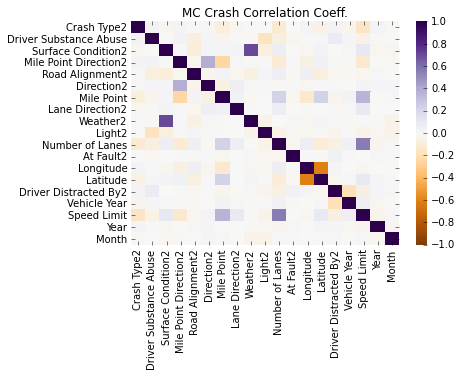

In [290]:
#creating heat map of correlated data
%matplotlib inline
corr_heatmap = sns.heatmap(data_corr, cmap="PuOr", vmin=-1, vmax=1)
corr_heatmap.set_title("MC Crash Correlation Coeff.")

plt.show()

In [291]:
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
!pip install --upgrade scipy --user
plt.style.use('classic')
import warnings
warnings.filterwarnings("ignore")

In [292]:
#split dataset into feature (independent variables) and target (dependent) variables
feature_cols = ['Driver Substance Abuse',	'Surface Condition2',	'Mile Point Direction2',	'Road Alignment2', 'Direction2',	'Mile Point',	'Lane Direction2'	,
                'Weather2','Light2',	'Number of Lanes',	'At Fault2',	'Longitude',	'Latitude',	'Driver Distracted By2',	'Vehicle Year',	'Speed Limit',	'Year',	'Month']
X = data[feature_cols] # Features
y = data['Crash Type2'] # Target variable

In [293]:
X.head()

,Driver Substance Abuse,Surface Condition2,Mile Point Direction2,Road Alignment2,Direction2,Mile Point,Lane Direction2,Weather2,Light2,Number of Lanes,At Fault2,Longitude,Latitude,Driver Distracted By2,Vehicle Year,Speed Limit,Year,Month
60394,0,0,1,3,1,9.73,2,2,4,2,1,-77.001418,39.105932,9,1999.0,45.0,2015,10
19889,0,0,1,3,1,0.00,1,2,4,0,1,-77.264460,39.185735,9,2014.0,25.0,2015,11
99574,0,0,1,0,1,3.35,1,3,4,2,1,-77.233720,39.249432,12,2014.0,40.0,2015,5
55689,0,0,0,3,0,2.42,4,2,1,3,1,-77.036000,39.036000,9,2003.0,35.0,2015,9
55690,0,0,0,3,0,2.42,4,2,1,3,1,-77.036000,39.036000,7,2006.0,35.0,2015,9


In [294]:
#split X and y into training and testing sets
#dataset broken into two parts, 75% will be used for model training and 25% for model testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [295]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# fit the model with data
logreg.fit(X_train,y_train)

# predict
y_pred=logreg.predict(X_test)

In [296]:
print('Classes', logreg.classes_)
print('Intercept',logreg.intercept_)
print("Coefficients", logreg.coef_ )

Classes [0 1 2]
Intercept [-2.11095057e-06  1.94285008e-05 -1.73175502e-05]
Coefficients [[ 2.25966778e-04 -3.23097650e-03 -8.76362606e-04 -1.45026777e-03
  -1.20931443e-03  8.57835007e-03 -4.44346052e-05 -1.50217052e-03
  -3.06180512e-03  1.67090990e-03  4.49733414e-03  1.04741865e-04
  -2.65818794e-05  1.87951886e-02  3.19759543e-04  2.07313675e-02
  -2.56078257e-03  2.78569392e-03]
 [-3.88354787e-03  4.56502629e-03 -5.78321321e-04 -3.94334531e-04
  -9.42441807e-03  2.60042204e-04  6.26671609e-03 -9.76527796e-03
   1.53418489e-02  2.65645284e-02 -6.24691446e-03 -3.82637788e-03
   2.59035300e-03 -2.19218948e-02 -1.24085692e-04  2.01273008e-03
   7.26029371e-04  3.39801273e-04]
 [ 3.65758109e-03 -1.33404979e-03  1.45468393e-03  1.84460230e-03
   1.06337325e-02 -8.83839227e-03 -6.22228148e-03  1.12674485e-02
  -1.22800438e-02 -2.82354383e-02  1.74958032e-03  3.72163602e-03
  -2.56377112e-03  3.12670619e-03 -1.95673851e-04 -2.27440976e-02
   1.83475320e-03 -3.12549520e-03]]


In [297]:
print("Accuracy", logreg.score(X_test, y_test))
print(classification_report(y_test, logreg.predict(X_test)))

Accuracy 0.6211617271485419
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.43      0.04      0.07     12506
           2       0.63      0.97      0.76     21088

    accuracy                           0.62     33674
   macro avg       0.35      0.34      0.28     33674
weighted avg       0.55      0.62      0.50     33674



In [298]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[    0,     0,    80],
       [    0,   499, 12007],
       [    0,   670, 20418]])

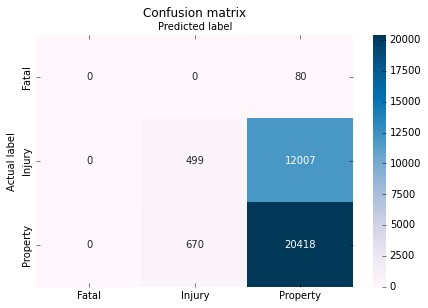

In [299]:
#name of classes
%matplotlib inline
class_names=['Fatal', 'Injury', 'Property']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Fatal', 'Injury', 'Property'])
ax.yaxis.set_ticklabels(['Fatal', 'Injury', 'Property']);

In [300]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average= 'weighted'))

Accuracy: 0.6211617271485419
Precision: 0.5519016215093016
Recall: 0.6211617271485419


Redoing test, but removing Longitude, and Latitude, Year, and Mile Point Direction Variable.

In [301]:
#split dataset into feature (independent variables) and target (dependent) variables
feature_cols = ['Driver Substance Abuse',	'Surface Condition2',	'Road Alignment2', 'Direction2',	'Mile Point',	'Lane Direction2'	,
                'Weather2','Light2',	'Number of Lanes',	'At Fault2',	'Driver Distracted By2',	'Vehicle Year',	'Speed Limit',	'Month']
X = data[feature_cols] # Features
y = data['Crash Type2'] # Target variable

In [302]:
X.head()

,Driver Substance Abuse,Surface Condition2,Road Alignment2,Direction2,Mile Point,Lane Direction2,Weather2,Light2,Number of Lanes,At Fault2,Driver Distracted By2,Vehicle Year,Speed Limit,Month
60394,0,0,3,1,9.73,2,2,4,2,1,9,1999.0,45.0,10
19889,0,0,3,1,0.00,1,2,4,0,1,9,2014.0,25.0,11
99574,0,0,0,1,3.35,1,3,4,2,1,12,2014.0,40.0,5
55689,0,0,3,0,2.42,4,2,1,3,1,9,2003.0,35.0,9
55690,0,0,3,0,2.42,4,2,1,3,1,7,2006.0,35.0,9


In [303]:
#split X and y into training and testing sets
#dataset broken into two parts, 75% will be used for model training and 25% for model testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [304]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# fit the model with data
logreg.fit(X_train,y_train)

# predict
y_pred=logreg.predict(X_test)

In [305]:
print('Classes', logreg.classes_)
print('Intercept',logreg.intercept_)
print("Coefficients", logreg.coef_ )

Classes [0 1 2]
Intercept [-0.00454691 -0.0086006   0.01314751]
Coefficients [[ 2.28436529e-04 -6.96078521e-03 -1.46736402e-02 -7.02417184e-03
   7.55562659e-03 -5.85193861e-03 -1.44013326e-02 -1.85459466e-02
  -1.84503446e-03  7.44583013e-05 -4.36034076e-02 -8.71833256e-04
  -3.92221265e-02 -2.53591515e-02]
 [-4.25605337e-03  1.32340160e-02 -2.26232118e-02 -1.55780725e-02
   3.27885098e-03  3.91022196e-04 -2.23946812e-02 -2.91511650e-03
   2.74554202e-02 -1.47904676e-02  2.97068082e-04  3.61351259e-04
   2.83959182e-02  7.64945783e-03]
 [ 4.02761685e-03 -6.27323083e-03  3.72968519e-02  2.26022444e-02
  -1.08344776e-02  5.46091641e-03  3.67960138e-02  2.14610631e-02
  -2.56103858e-02  1.47160093e-02  4.33063395e-02  5.10481997e-04
   1.08262083e-02  1.77096937e-02]]


In [306]:
print("Accuracy", logreg.score(X_test, y_test))
print(classification_report(y_test, logreg.predict(X_test)))

Accuracy 0.6214586921660629
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.43      0.04      0.07     12506
           2       0.63      0.97      0.76     21088

    accuracy                           0.62     33674
   macro avg       0.35      0.34      0.28     33674
weighted avg       0.55      0.62      0.50     33674



In [307]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[    0,     1,    79],
       [    0,   492, 12014],
       [    0,   653, 20435]])

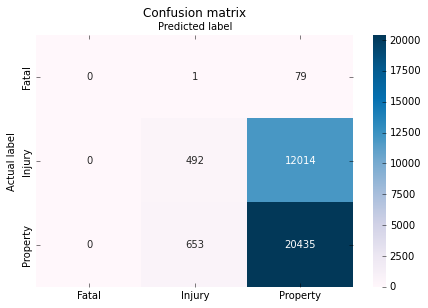

In [308]:
#name of classes
%matplotlib inline
class_names=['Fatal', 'Injury', 'Property']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
#heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['Fatal', 'Injury', 'Property'])
ax.yaxis.set_ticklabels(['Fatal', 'Injury', 'Property']);

In [309]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average= 'weighted'))

Accuracy: 0.6214586921660629
Precision: 0.5528639270024016
Recall: 0.6214586921660629


Model didn't change much.  

Creating a new model to try and predict crashes in 2022.

Source(https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/)

In [310]:
!pip install fbprophet
from pandas import to_datetime
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [313]:
mc_incidents.head()

,Road Condition,Driver Substance Abuse,Surface Condition,Mile Point Direction,Road Alignment,Direction,Mile Point,Cross-Street Name,Road Name,Lane Direction,Weather,Light,Collision Type,Hit/Run,Crash Date/Time,ACRS Report Type,Agency Name,Location,Number of Lanes,Longitude,At Fault,Latitude,Report Number,Driver Distracted By,Injury Severity,Vehicle Model,Vehicle Make,Vehicle Year,Driverless Vehicle,Speed Limit,Vehicle Body Type,Year,Month,Day
60394,No Defects,None Detected,DRY,North,Straight,North,9.73,Norwood Rd,New Hampshire Ave,South,Clear,Daylight,Head on left turn,No,2015-10-12,Property Damage Crash,Montgomery,"(39.10593167, -77.00141833)",2,-77.001418,DRIVER,39.105932,MCP29290012,Not Distracted,No Apparent Injury,2S,Merz,1999.0,No,45.0,Passenger Car,2015,10,12
19889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,Daylight,Single vehicle,No,2015-11-04,Property Damage Crash,Montgomery,"(39.185735, -77.26446)",0,-77.264460,DRIVER,39.185735,MCP2882001D,Not Distracted,No Apparent Injury,Interceptor,Ford,2014.0,No,25.0,Police Vehicle/Emergency,2015,11,04
99574,No Defects,NaN,DRY,North,Curve Left,North,3.35,Cedar Grove Elementary School,Ridge Rd,North,Cloudy,Daylight,Opposite direction sideswipe,No,2015-05-11,Property Damage Crash,Montgomery County Police,"(39.24943167, -77.23372)",2,-77.233720,DRIVER,39.249432,MCP1522000H,Other Electronic Device (Navigational Palm Pilot),No Apparent Injury,F-250,Ford,2014.0,No,40.0,Passenger Car,2015,5,11
55689,No Defects,None Detected,DRY,East,Straight,East,2.42,Inwood Ave,University Blvd W,West,Clear,Dark Lights On,Head on left turn,No,2015-09-10,Injury Crash,Montgomery,"(39.036, -77.036)",3,-77.036000,DRIVER,39.036000,MCP2749000Z,Not Distracted,Possible Injury,Mc1,Yama,2003.0,No,35.0,Motorcycle,2015,9,10
55690,No Defects,None Detected,DRY,East,Straight,East,2.42,Inwood Ave,University Blvd W,West,Clear,Dark Lights On,Head on left turn,No,2015-09-10,Injury Crash,Montgomery,"(39.036, -77.036)",3,-77.036000,DRIVER,39.036000,MCP2749000Z,Looked But Did Not See,No Apparent Injury,4S,Scio,2006.0,No,35.0,Passenger Car,2015,9,10


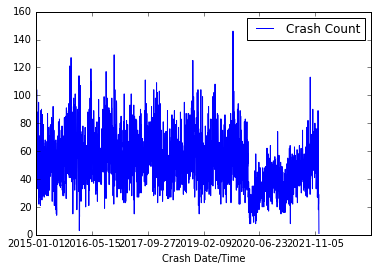

In [314]:
date_count = mc_incidents.groupby(['Crash Date/Time']).size().reset_index(name='Crash Count')
date_count.plot(x='Crash Date/Time', y='Crash Count')
plt.show()



In [315]:
date_count.rename(columns={'Crash Date/Time': 'ds', 'Crash Count': 'y'}, inplace=True)
date_count.info

<bound method DataFrame.info of               ds   y
0     2015-01-01  45
1     2015-01-02  37
2     2015-01-03  64
3     2015-01-04  38
4     2015-01-05  44
...          ...  ..
2530  2021-12-05  22
2531  2021-12-06  22
2532  2021-12-07  29
2533  2021-12-08  15
2534  2021-12-09   1

[2535 rows x 2 columns]>

In [318]:
from fbprophet import Prophet
model = Prophet()
# fit the model
model.fit(date_count);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [319]:
future = list()
for i in range(1, 13):
	date = '2022-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [320]:
# use the model to make a forecast
forecast = model.predict(future)

          ds       yhat  yhat_lower  yhat_upper
0 2022-01-01  36.059108   17.952006   55.008557
1 2022-02-01  49.061053   31.908797   67.342055
2 2022-03-01  52.412740   34.657263   70.475704
3 2022-04-01  47.286264   29.598181   65.338227
4 2022-05-01  34.779197   16.634598   53.903637


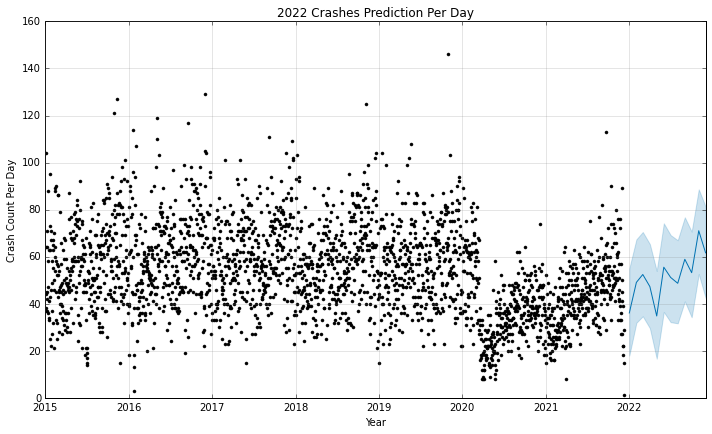

In [321]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.title("2022 Crashes Prediction Per Day")
plt.xlabel("Year")
plt.ylabel("Crash Count Per Day")
plt.show()


In [322]:
# create test dataset, remove last 12 months
train = date_count.drop(date_count.index[-12:])
print(train.tail())

              ds   y
2518  2021-11-23  76
2519  2021-11-24  57
2520  2021-11-25  27
2521  2021-11-26  33
2522  2021-11-27  36


In [323]:
from sklearn.metrics import mean_absolute_error
# calculate MAE between expected and predicted values for december
y_true = date_count['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 28.784


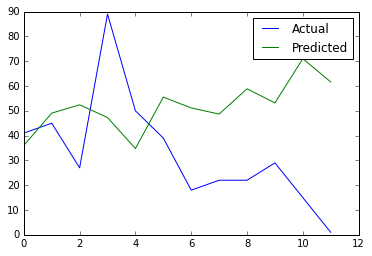

In [324]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

#Part II:  Kaggle US Crashes Dataset

In [325]:
! pip install -q kaggle

from google.colab import files

files.upload()

#Choose the kaggle.json file that you downloaded
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

#Make directory named kaggle and copy kaggle.json file there.
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [326]:
#download dataset from kaggle
!kaggle datasets download sobhanmoosavi/us-accidents

 96% 113M/117M [00:00<00:00, 105MB/s] 
100% 117M/117M [00:00<00:00, 126MB/s]


In [327]:
#unzip file
! unzip us-accidents.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec20_updated.csv  


In [328]:
#reading in data
us_crash = pd.read_csv("/content/US_Accidents_Dec20_updated.csv")
#us_crash = pd.read_csv("/content/sample_data/US_Accidents_Dec20_updated.csv")
#us_crash = pd.read_csv("/input/us-accidents/US_Accidents_Dec20_updated.csv")

##Part II Data Wrangling

In [329]:
us_crash.shape

(1516064, 47)

In [330]:
us_crash.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [331]:
us_crash.isna().sum().sort_values(ascending = False)

Number                   1046095
Precipitation(in)         510549
Wind_Chill(F)             449316
Wind_Speed(mph)           128862
Humidity(%)                45509
Visibility(mi)             44211
Weather_Condition          44007
Temperature(F)             43033
Wind_Direction             41858
Pressure(in)               36274
Weather_Timestamp          30264
Airport_Code                4248
Timezone                    2302
Zipcode                      935
City                          83
Nautical_Twilight             83
Astronomical_Twilight         83
Civil_Twilight                83
Sunrise_Sunset                83
Amenity                        0
Bump                           0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Street    

In [332]:
us_crash.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [333]:
#extracint year from date column
us_crash['Year'] = pd.DatetimeIndex(us_crash['Start_Time']).year
us_crash.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016


In [334]:
#confirming years of dataset
us_crash['Year'].unique()

array([2016, 2017, 2020, 2019, 2018])

In [335]:
#extracting date into its own column
us_crash['Date'] = pd.DatetimeIndex(us_crash['Start_Time']).date
us_crash.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Date
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2016-02-08
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2016-02-08
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2016-02-08
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2016-02-08
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016,2016-02-08


Part II:  EDA & Visualizations

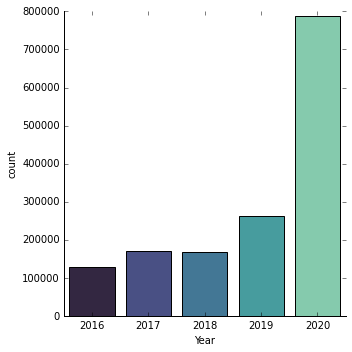

In [336]:
sns.catplot(x='Year', data=us_crash[us_crash['Year']<=2020], kind='count', palette='mako')
plt.show()

Upward trend of crashes, with a large increase in 2020.

In [337]:
#creating seperate count df
us_year_trend = us_crash.groupby(['Year']).size().reset_index(name='Crash Count')
us_year_trend['Year'] = us_year_trend['Year'].astype(str).astype(int)

In [338]:
us_year_trend


,Year,Crash Count
0,2016,129325
1,2017,170099
2,2018,166936
3,2019,261772
4,2020,787932


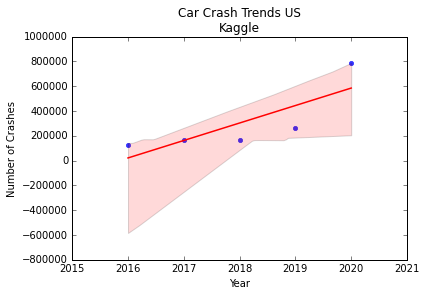

In [339]:
##making timeline scatter plot with regressin line for US crashes 2016-2020
trend = sns.regplot(x='Year',y='Crash Count', data=us_year_trend, fit_reg=True, line_kws={'color': 'red'})
plt.title('Car Crash Trends US\nKaggle')
# Set x-axis label
plt.xlabel('Year')
# Set y-axis label
plt.ylabel('Number of Crashes')
plt.xlim(2015,2021)
trend.set_xticklabels(['2015','2016','2017', '2018', '2019', '2020', '2021']) #rename ticks 
plt.show()

Confirmed updard trend of car crash frequency.  No outliers with 95% confidence interval.  Maybe an unstable estimate given widness of CI.

In [340]:
#quickly looking at count by city
cities = us_crash.City.value_counts()
cities

Los Angeles      39984
Miami            36233
Charlotte        22203
Houston          20843
Dallas           19497
                 ...  
Camp Dennison        1
Fort Scott           1
Coats                1
Ruthven              1
Culbertson           1
Name: City, Length: 10657, dtype: int64

In [341]:
#making a MD specific df
md = us_crash[(us_crash.State == "MD")]
md

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Date
32560,A-2749160,4,2016-11-30 16:25:08,2016-11-30 22:25:08,39.091710,-76.758870,39.092160,-76.717160,2.237,Closed between MD-198/Laurel Fort Meade Rd and...,NaN,MD-32 E,R,Fort George G Meade,Anne Arundel,MD,20755,US,US/Eastern,KFME,2016-11-30 16:24:00,62.6,NaN,94.0,29.72,1.8,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016-11-30
32561,A-2749161,4,2016-11-30 16:27:29,2016-11-30 22:27:29,39.089180,-76.752990,39.101843,-76.769504,1.245,Closed between MD-198/Laurel Fort Meade Rd and...,NaN,Patuxent Fwy W,R,Fort George G Meade,Anne Arundel,MD,20755,US,US/Eastern,KFME,2016-11-30 16:24:00,62.6,NaN,94.0,29.72,1.8,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016-11-30
32565,A-2749165,3,2016-11-30 16:42:35,2016-11-30 22:42:35,39.634950,-78.832560,39.635600,-78.826000,0.352,At Vocke Rd/Exit 40 - Accident.,NaN,US-40 E,R,Cumberland,Allegany,MD,21502,US,US/Eastern,KCBE,2016-11-30 14:50:00,50.0,NaN,100.0,29.77,4.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016-11-30
32572,A-2749172,4,2016-11-30 17:08:23,2016-11-30 23:08:23,39.208430,-77.169280,39.213025,-77.172053,0.350,Closed at Glendalough Rd - Road closed due to ...,8301.0,Brink Rd,L,Gaithersburg,Montgomery,MD,20882,US,US/Eastern,KGAI,2016-11-30 17:15:00,60.8,NaN,88.0,29.73,5.0,North,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Day,Day,Day,2016,2016-11-30
32573,A-2749173,4,2016-11-30 17:08:23,2016-11-30 23:08:23,39.213025,-77.172053,39.208430,-77.169280,0.350,Closed at Brink Rd - Road closed due to accident.,21802.0,Woodfield Rd,R,Gaithersburg,Montgomery,MD,20882-4802,US,US/Eastern,KGAI,2016-11-30 17:15:00,60.8,NaN,88.0,29.73,5.0,North,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2016,2016-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515183,A-4238526,2,2019-08-22 19:48:26,2019-08-22 20:17:11,39.494560,-76.892370,39.495610,-76.891580,0.084,At MD-140/Baltimore Blvd - Accident. Lane bloc...,2999.0,Gamber Rd,L,Finksburg,Carroll,MD,21048,US,US/Eastern,KDMW,2019-08-22 19:40:00,75.0,75.0,89.0,29.10,3.0,CALM,0.0,0.44,Heavy T-Storm,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019,2019-08-22
1515184,A-4238527,2,2019-08-22 19:48:26,2019-08-22 20:17:11,39.495610,-76.891580,39.494560,-76.892370,0.084,At MD-140/Baltimore Blvd - Accident. Lane bloc...,NaN,Emory Rd,R,Finksburg,Carroll,MD,21048,US,US/Eastern,KDMW,2019-08-22 19:40:00,75.0,75.0,89.0,29.10,3.0,CALM,0.0,0.44,Heavy T-Storm,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2019,2019-08-22
1515185,A-4238528,4,2019-08-22 19:57:25,2019-08-23 00:56:06,39.600500,-77.677230,39.605440,-77.734220,3.053,Closed between MD-66/Exit 35 and MD-65/Exit 29...,NaN,I-70 W,R,Hagerstown,Washington,MD,21740,US,US/Eastern,KHGR,2019-08-22 19:53:00,75.0,75.0,84.0,29.17,10.0,NE,5.0,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2019,2019-08-22
1515668,A-4239011,2,2019-08-23 08:03:29,2019

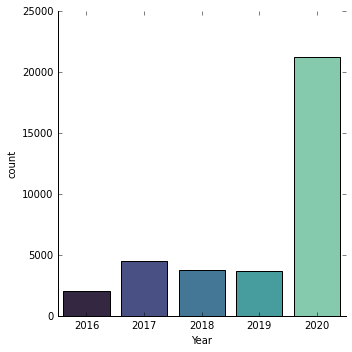

In [342]:
#graphing frequency trend for state of MD
sns.catplot(x='Year', data=md[md['Year']<=2020], kind='count', palette='mako')
plt.show()

Trend similar to US with a slighly higher count in 2017.

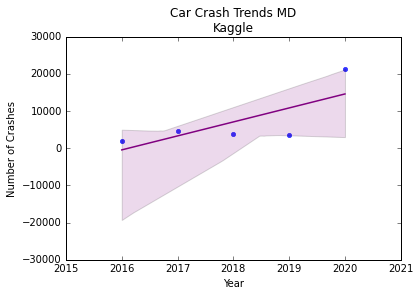

In [343]:
#making timeline scatter plot with regressin line for MD crashes 2016-2020
md_year_trend = md.groupby(['Year']).size().reset_index(name='Crash Count')
md_year_trend['Year'] = md_year_trend['Year'].astype(str).astype(int)
#scatter plot with trend lines for all us crashes 2015-2020
trend = sns.regplot(x='Year',y='Crash Count', data=md_year_trend, fit_reg=True, line_kws={'color': 'purple'})
plt.title('Car Crash Trends MD\nKaggle')
# Set x-axis label
plt.xlabel('Year')
# Set y-axis label
plt.ylabel('Number of Crashes')
trend.set_xticklabels(['2015','2016','2017', '2018', '2019', '2020', '2021'])
plt.show()

Confirmed similar trend as US.

In [344]:
pd.set_option("display.max_rows", 40)
top_15_md = pd.DataFrame(md.City.value_counts().head(15))

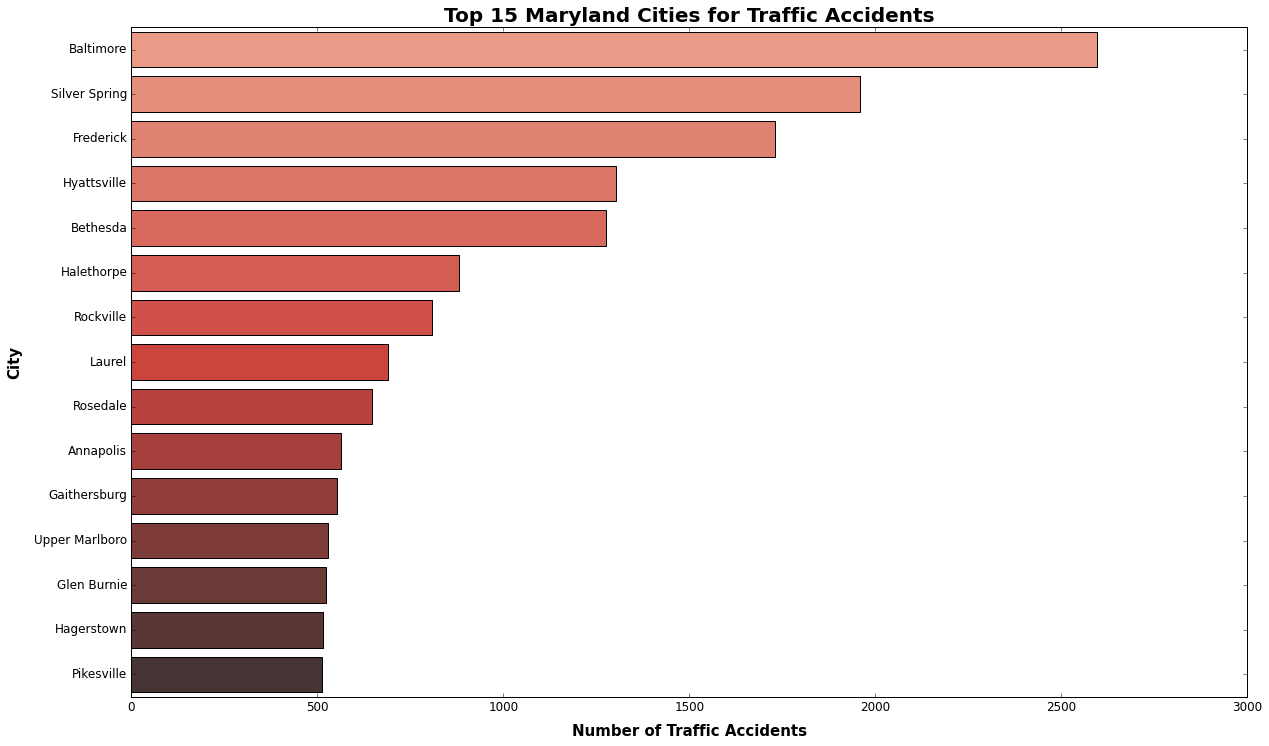

In [345]:
#Showing top cities in MD for traffic accidents.
%matplotlib inline
plt.figure(figsize=(20,12))
sns.barplot(top_15_md['City'],top_15_md.index,palette="Reds_d")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Number of Traffic Accidents", labelpad = 10, fontsize=15,weight='bold')
plt.ylabel("City", labelpad = 12,fontsize=15, weight='bold')
plt.title("Top 15 Maryland Cities for Traffic Accidents", fontsize=20,weight='bold');

Montgomery County has number two spot with Silver Spring, and number five with Bethesda.

In [346]:
#Creating moco dataset
moco = us_crash[(us_crash.County == "Montgomery")]
moco

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Date
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016,2016-02-08
8,A-2716608,2,2016-02-08 08:15:41,2016-02-08 14:15:41,39.775650,-84.186030,39.772750,-84.188050,0.227,At OH-4/Exit 54 - Accident.,NaN,I-75 S,R,Dayton,Montgomery,OH,45404,US,US/Eastern,KFFO,2016-02-08 08:18:00,33.8,NaN,100.0,29.63,3.0,SW,2.3,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016-02-08
25,A-2716625,2,2016-02-09 06:10:59,2016-02-09 12:10:59,39.857980,-84.281810,39.864410,-84.215540,3.543,Between OH-48/Exit 29 and Dayton Intl Airport ...,NaN,I-70 E,R,Dayton,Montgomery,OH,45415,US,US/Eastern,KDAY,2016-02-09 06:03:00,23.0,10.1,88.0,29.66,2.0,West,15.0,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016,2016-02-09
33,A-2716633,2,2016-02-09 08:00:16,2016-02-09 14:00:16,39.750670,-84.141480,39.748830,-84.134020,0.416,At Smithville Rd - Accident.,NaN,US-35 E,R,Dayton,Montgomery,OH,45410,US,US/Eastern,KFFO,2016-02-09 07:58:00,22.5,12.4,90.0,29.73,1.2,SW,9.2,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016-02-09
53,A-2716653,2,2016-02-10 08:44:31,2016-02-10 14:44:31,39.744287,-84.204939,39.750520,-84.205410,0.431,At US-35/Albany St/Exit 52 - Accident.,NaN,I-75 N,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-10 08:47:00,14.0,-2.5,84.0,29.92,3.0,West,17.3,0.00,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,2016-02-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514133,A-4237476,2,2019-08-20 19:55:04,2019-08-20 20:23:37,35.365090,-79.766040,35.356620,-79.765400,0.586,At NC-24/NC-27 - Accident. Right lane blocked.,NaN,I-73 S,R,Biscoe,Montgomery,NC,27209,US,US/Eastern,KHBI,2019-08-20 19:35:00,80.0,80.0,72.0,29.39,10.0,SW,3.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019,2019-08-20
1514141,A-4237484,2,2019-08-20 20:21:18,2019-08-20 20:49:05,35.348300,-79.762986,35.335140,-79.751374,1.120,At NC-211 - Accident. Right lane blocked.,NaN,US Highway 220 S,R,Biscoe,Montgomery,NC,27209,US,US/Eastern,KHBI,2019-08-20 19:35:00,80.0,80.0,72.0,29.39,10.0,SW,3.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2019,2019-08-20
1514621,A-4237964,2,2019-08-21 18:22:20,2019-08-21 18:51:28,40.131019,-75.285835,40.131019,-75.285835,0.000,At I-276/Pennsylvania Tpke/Exit 20 - Accident.,NaN,I-476 S,R,Plymouth Meeting,Montgomery,PA,19462,US,US/Eastern,KLOM,2019-08-21 18:15:00,77.0,77.0,89.0,29.56,10.0,CALM,0.0,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2019,2019-08-21
1515179,A-4238522,2,2019-08-22 18:21:36,2019-08-22 18:50:47,40.160239,-75.126799,40.160950,-75.124420,0.135,At PA-611/Exit 343 - Accident. Left lane blocked.,NaN,I-276 E,R,Willow 

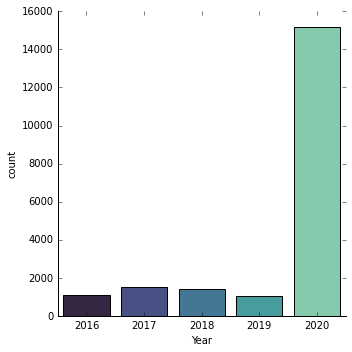

In [347]:
sns.catplot(x='Year', data=moco[moco['Year']<=2020], kind='count', palette='mako')
plt.show()

Noting this data set count of crashes is very different dataMontgomery's for year 2016 - 2019, and slighly over for 2020.  Most likely the US data set does not include many crashes shown in dataMontgomery set.

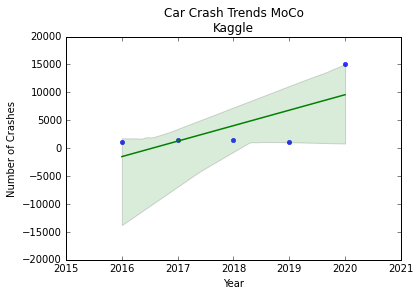

In [348]:
#making timeline scatter plot with regressin line for MoCo crashes 2016-2020
moco_year_trend = moco.groupby(['Year']).size().reset_index(name='Crash Count')
moco_year_trend['Year'] = moco_year_trend['Year'].astype(str).astype(int)
#scatter plot with trend lines for all us crashes 2015-2020
trend = sns.regplot(x='Year',y='Crash Count', data=moco_year_trend, fit_reg=True, line_kws={'color': 'green'})
plt.title('Car Crash Trends MoCo\nKaggle')
# Set x-axis label
plt.xlabel('Year')
# Set y-axis label
plt.ylabel('Number of Crashes')
trend.set_xticklabels(['2015','2016','2017', '2018', '2019', '2020', '2021'])
plt.show()

The graph is in line with the other two trends of this data set, but far different from dataMontgomery.  2016 - 2019 frequency count are all under 2,000, while dataMontgomer are all over 20,000.  At about 15,000 the 2020 count is much closer.

In [350]:
md_severity = md.groupby(['Severity','City'])['Severity'].count()
md_severity.sort_values(ascending=True)
md_severity

Severity  City                  
1         Andrews Air Force Base     2
          Baltimore                 14
          Beltsville                 3
          Bethesda                  17
          Bladensburg                1
                                    ..
4         Williamsport              35
          Windsor Mill              35
          Woodbine                  24
          Woodsboro                  7
          Wye Mills                  1
Name: Severity, Length: 823, dtype: int64

In [351]:
crash_sev = us_crash.groupby(['Year', 'Severity']).size().unstack()

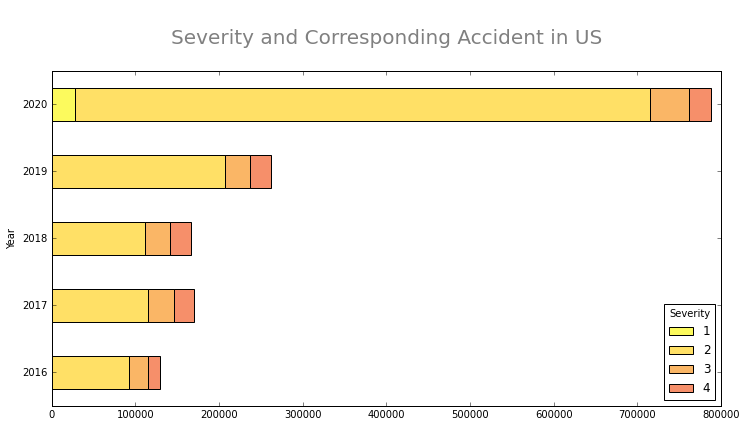

In [352]:
ax = crash_sev.plot(kind='barh', stacked=True, figsize=(12, 6), 
                               color=['#fcfa5d', '#ffe066', '#fab666', '#f68f6a'],
                               rot=0);

ax.set_title('\nSeverity and Corresponding Accident in US\n', fontsize=20, color='grey');

In [353]:
crash_sev_md = md.groupby(['Year', 'Severity']).size().unstack()
crash_sev_moco = moco.groupby(['Year', 'Severity']).size().unstack()

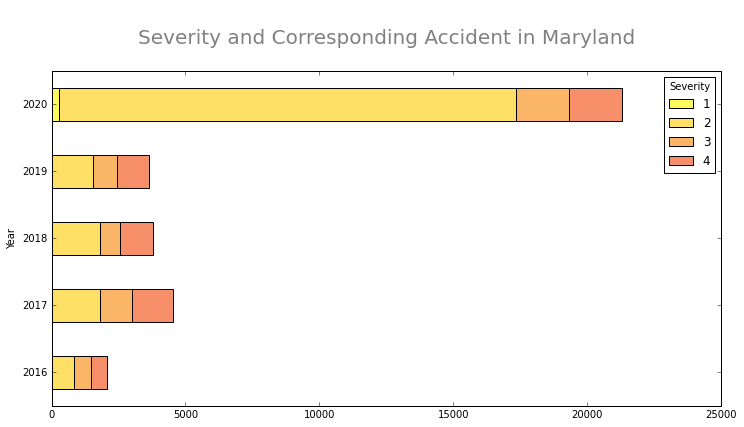

In [354]:
ax1 = crash_sev_md.plot(kind='barh', stacked=True, figsize=(12, 6), 
                               color=['#fcfa5d', '#ffe066', '#fab666', '#f68f6a'],
                               rot=0);

ax1.set_title('\nSeverity and Corresponding Accident in Maryland\n', fontsize=20, color='grey');

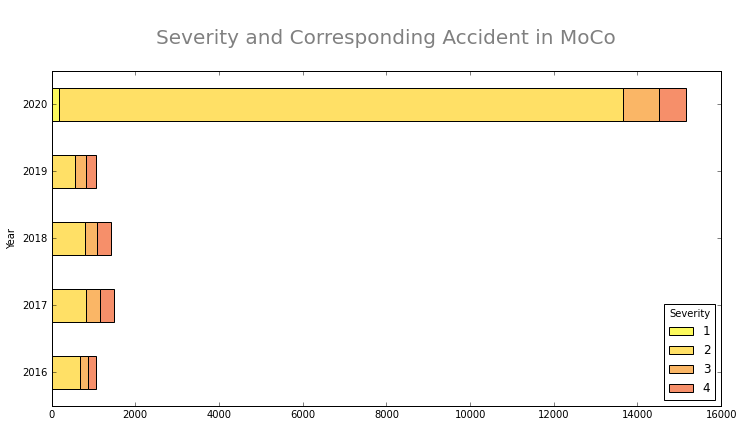

In [355]:
ax2 = crash_sev_moco.plot(kind='barh', stacked=True, figsize=(12, 6), 
                               color=['#fcfa5d', '#ffe066', '#fab666', '#f68f6a'],
                               rot=0);

ax2.set_title('\nSeverity and Corresponding Accident in MoCo\n', fontsize=20, color='grey');

In [356]:
us_daily_stats = us_crash.groupby(['Year','Date']).size().reset_index(name='Crash Count')
us_daily_stats

,Year,Date,Crash Count
0,2016,2016-02-08,24
1,2016,2016-02-09,24
2,2016,2016-02-10,33
3,2016,2016-02-11,58
4,2016,2016-02-12,11
...,...,...,...
1729,2020,2020-12-27,4849
1730,2020,2020-12-28,7698
1731,2020,2020-12-29,7320
1732,2020,2020-12-30,8425


In [357]:
#finding daily max of crashes for US
us_daily_max = us_daily_stats.loc[us_daily_stats.groupby("Year")["Crash Count"].idxmax()]
us_daily_max = us_daily_max.rename(columns={"Crash Count": "Daily Max"})
us_daily_max

,Year,Date,Daily Max
306,2016,2016-12-16,1154
359,2017,2017-02-07,1029
1026,2018,2018-12-06,1167
1387,2019,2019-12-04,2136
1726,2020,2020-12-24,8600


In [358]:
#show average monthly, daily, and hourly crashes
us_yearly_stats = us_crash.groupby(['Year']).size().reset_index(name='Crash Count')
us_yearly_stats["Avg Monthly"] = us_yearly_stats["Crash Count"]/12
us_yearly_stats["Avg Daily"] = us_yearly_stats["Crash Count"]/365
us_yearly_stats["Avg Hourly"] = us_yearly_stats["Crash Count"]/8760
us_yearly_stats

,Year,Crash Count,Avg Monthly,Avg Daily,Avg Hourly
0,2016,129325,10777.083333,354.315068,14.763128
1,2017,170099,14174.916667,466.024658,19.417694
2,2018,166936,13911.333333,457.358904,19.056621
3,2019,261772,21814.333333,717.183562,29.882648
4,2020,787932,65661.000000,2158.717808,89.946575


In [359]:
md_daily_stats = md.groupby(['Year','Date']).size().reset_index(name='Crash Count')
md_daily_stats

,Year,Date,Crash Count
0,2016,2016-03-24,3
1,2016,2016-03-26,3
2,2016,2016-03-27,1
3,2016,2016-03-30,1
4,2016,2016-04-02,2
...,...,...,...
1519,2020,2020-12-27,168
1520,2020,2020-12-28,153
1521,2020,2020-12-29,174
1522,2020,2020-12-30,165


In [360]:
#finding daily max of crashes for MD
md_daily_max = md_daily_stats.loc[md_daily_stats.groupby("Year")["Crash Count"].idxmax()]
md_daily_max = md_daily_max.rename(columns={"Crash Count": "Daily Max"})
md_daily_max

,Year,Date,Daily Max
95,2016,2016-08-18,34
506,2017,2017-10-19,38
655,2018,2018-03-20,47
948,2019,2019-02-20,44
1509,2020,2020-12-17,565


In [361]:
#show average monthly, daily, and hourly crashes
md_yearly_stats = md.groupby(['Year']).size().reset_index(name='Crash Count')
md_yearly_stats["Avg Monthly"] = md_yearly_stats["Crash Count"]/12
md_yearly_stats["Avg Daily"] = md_yearly_stats["Crash Count"]/365
md_yearly_stats["Avg Hourly"] = md_yearly_stats["Crash Count"]/8760

md_yearly_stats

,Year,Crash Count,Avg Monthly,Avg Daily,Avg Hourly
0,2016,2057,171.416667,5.635616,0.234817
1,2017,4537,378.083333,12.430137,0.517922
2,2018,3777,314.750000,10.347945,0.431164
3,2019,3654,304.500000,10.010959,0.417123
4,2020,21295,1774.583333,58.342466,2.430936


In [362]:
moco_daily_stats = moco.groupby(['Year','Date']).size().reset_index(name='Crash Count')
moco_daily_stats

,Year,Date,Crash Count
0,2016,2016-02-08,2
1,2016,2016-02-09,2
2,2016,2016-02-10,4
3,2016,2016-02-11,4
4,2016,2016-02-13,1
...,...,...,...
1446,2020,2020-12-27,96
1447,2020,2020-12-28,92
1448,2020,2020-12-29,137
1449,2020,2020-12-30,140


In [363]:
#finding daily max of crashes for MoCo
moco_daily_max = moco_daily_stats.loc[moco_daily_stats.groupby("Year")["Crash Count"].idxmax()]
moco_daily_max = moco_daily_max.rename(columns={"Crash Count": "Daily Max"})
moco_daily_max

,Year,Date,Daily Max
87,2016,2016-06-27,18
254,2017,2017-01-03,14
801,2018,2018-10-19,15
887,2019,2019-01-16,16
1436,2020,2020-12-17,246


In [364]:
#show average monthly, daily, and hourly crashes
moco_yearly_stats = moco.groupby(['Year']).size().reset_index(name='Crash Count')
moco_yearly_stats["Avg Monthly"] = moco_yearly_stats["Crash Count"]/12
moco_yearly_stats["Avg Daily"] = moco_yearly_stats["Crash Count"]/365
moco_yearly_stats["Avg Hourly"] = moco_yearly_stats["Crash Count"]/8760

moco_yearly_stats

,Year,Crash Count,Avg Monthly,Avg Daily,Avg Hourly
0,2016,1070,89.166667,2.931507,0.122146
1,2017,1502,125.166667,4.115068,0.171461
2,2018,1413,117.750000,3.871233,0.161301
3,2019,1059,88.250000,2.901370,0.120890
4,2020,15157,1263.083333,41.526027,1.730251


The average monthy, daily, and hourly frequency counts of the US, MD, and MoCo crashes show dramatic increases in crashes.  The data may be missing data from previous years, or there an crash crash epidemic is upon us.

##Part III:  Items for improvement of datasets

dataMontgomery - 

1.   List number of fatalities
2.   Driverless variable were all listed as 'Unknown' or 'No' despite there being over a 100 Tesla's.  This information may not be being collected. 
3.   Create a smaller number of categories for categorical data.  Substance abuse variable had many overlapping or confusing categories, or allowed fill in data.
4.   Categorize severity of accident on a number scale.


kaggle - 

1.   Incomeplete data.



